<a href="https://colab.research.google.com/github/Pineappledeydre/streaming_platforms/blob/main/Streaming_Platform_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import time
import math

import textwrap
import matplotlib.patches as patches


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from multiprocessing import Pool
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import linear_kernel
import networkx as nx


from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack

In [10]:
sns.set(style="darkgrid")

## Palette

In [11]:
color_palette = ['#201E43', '#134B70', '#508C9B']
background_color = "#ffffff"
text_color = '#000000'

color_netflix = '#db0000'
color_disney = '#021869'
color_amazon = "#1399FF"
color_mutual = color_palette[1]

# Data Overview

**Dataset Title**: Netflix Movies and TV Shows

**Source**: [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows/data)  
**Last Updated**: Regularly updated (as of the latest dataset entry)

**Description**:  
This dataset contains comprehensive metadata for all movies and TV shows available on Netflix, one of the leading streaming platforms globally. The dataset includes information such as titles, directors, cast members, countries of production, release years, ratings, durations, and the dates when each title was added to the platform.

**Features of the Dataset**

- **Unique ID (`show_id`)**: Each entry is assigned a unique identifier, allowing easy reference and data manipulation.

- **Type**: Indicates whether the entry is a Movie or a TV Show. This classification is essential for distinguishing between different formats of content.

- **Title**: The name of the movie or TV show. This is a critical feature for user identification and recommendations.

- **Director**: The individual(s) responsible for directing the movie or show. This information can be used for analysis on directing trends and popularity.

- **Cast**: A list of actors involved in the project. Analyzing cast members can provide insights into the popularity of specific actors or recurring collaborations.

- **Country**: The country of origin for the movie or show. This feature helps in analyzing geographic content distribution and cultural representation.

- **Date Added**: The date when the title was made available on Netflix. This allows for time-based analysis of content availability and platform growth.

- **Release Year**: The original release year of the title. This feature helps in analyzing trends over time, such as the emergence of genres or shifts in audience preferences.

- **Rating**: The content rating (e.g., PG, TV-MA) that indicates the suitability of the title for different audiences. This can be analyzed for understanding content targeting and audience demographics.

- **Duration**: For movies, this indicates the total runtime in minutes, while for TV shows, it indicates the number of seasons. This information is critical for user consumption patterns.

- **Listed In**: Genre classifications that provide insight into the thematic categorization of content.

**Dataset Title**: Disney+ Movies and TV Shows

**Source**: [Kaggle](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows)  
**Last Updated**: Regularly updated (as of the latest dataset entry)

**Description**:  
This dataset contains comprehensive metadata for all movies and TV shows available on Disney+, one of the most popular media and video streaming platforms. As of mid-2021, Disney+ has close to 1300 movies and TV shows available, with over 116 million subscribers globally. This tabular dataset consists of listings of all the movies and TV shows available on Disney+, along with details such as cast, directors, ratings, release years, durations, and the dates when each title was added to the platform.

**Features of the Dataset**

- **Unique ID (`show_id`)**: Each entry is assigned a unique identifier, allowing easy reference and data manipulation.

- **Type**: Indicates whether the entry is a Movie or a TV Show. This classification is essential for distinguishing between different formats of content.

- **Title**: The name of the movie or TV show. This is a critical feature for user identification and recommendations.

- **Director**: The individual(s) responsible for directing the movie or show. This information can be used for analysis on directing trends and popularity.

- **Cast**: A list of actors involved in the project. Analyzing cast members can provide insights into the popularity of specific actors or recurring collaborations.

- **Country**: The country of origin for the movie or show. This feature helps in analyzing geographic content distribution and cultural representation.

- **Date Added**: The date when the title was made available on Disney+. This allows for time-based analysis of content availability and platform growth.

- **Release Year**: The original release year of the title. This feature helps in analyzing trends over time, such as the emergence of genres or shifts in audience preferences.

- **Rating**: The content rating (e.g., PG, TV-MA) that indicates the suitability of the title for different audiences. This can be analyzed for understanding content targeting and audience demographics.

- **Duration**: For movies, this indicates the total runtime in minutes, while for TV shows, it indicates the number of seasons. This information is critical for user consumption patterns.

**Dataset Title**: Amazon Prime Movies and TV Shows

**Source**: [Kaggle](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)  
**Last Updated**: Regularly updated (as of mid-2021)

**Description**:  
This dataset provides detailed metadata on movies and TV shows available on Amazon Prime Video, one of the most popular video streaming platforms globally. As of mid-2021, Amazon Prime Video has over 200 million subscribers and offers nearly 10,000 movies and TV shows. The dataset includes various features such as the cast, directors, ratings, release year, and duration, offering rich opportunities for analysis and insight generation.

**Features of the Dataset**:

- **Unique ID (`show_id`)**: Each entry is assigned a unique identifier for efficient data handling and referencing.

- **Type**: Classification of content as either a Movie or a TV Show, helping distinguish between different types of media content on the platform.

- **Title**: The title of the movie or TV show, essential for recommendations and identification.

- **Director**: Information about the directors responsible for the content, useful for trend analysis and understanding directorial impact.

- **Cast**: Lists the actors involved in the content. Analyzing this feature helps in understanding trends in actor popularity or recurring collaborations.

- **Country**: The country where the content was produced. This feature can be used to explore geographic diversity and the cultural representation on the platform.

- **Date Added**: The date when the content was made available on Amazon Prime Video. This feature allows for analysis of platform content growth over time.

- **Release Year**: The original release year of the content, enabling trend analysis on how preferences have changed over the years.

- **Rating**: The content's rating (e.g., PG, TV-MA), which indicates audience suitability and can be used to understand audience demographics.

- **Duration**: For movies, this indicates the total runtime, while for TV shows, it indicates the number of seasons. This feature is essential for analyzing user engagement with content length.

- **Genres**: A breakdown of genres associated with the content, which helps in understanding popular genres and trends on the platform.

## First look at the data

In [12]:
import os
import sys
import pandas as pd
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'


DATA_SOURCE_MAPPING = [
    'netflix-shows:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F434238%2F2654038%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241012%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241012T123421Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c3b341aad9c69afcbc4f32c76021e488af9aaf2c2e4d6057d93ca53072c4c58d4138f25319dd37246b732a56781fd249444cba6c7b53e1991a5f207481bee582ed0b8bb1b92f99b70e100b6cb97f40448818b0846f67fd783733f62a19d2b9f87cc06d372a363547f29913e4a0b9f50235a298fb824895aa1b00c6126a5bacb6e1263746a5765c6d6cbbae12d1bc98f5fb39b68628286cb1b43e7f85f8e37a0bfe44b0668f9dd1145040604173a4aa61dd219e06bf662310bf9c3375e357346b456af3d85a46b30c9b9f5ac78f3237242b90086504e6427dc05b180df1898a32d753745f875127d1cfaaa58f05da6a96801fbeee073a1c499deded8f69e7c10',
    'disney-movies-and-tv-shows:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1624191%2F2864236%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241012%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241012T123607Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0dda12fb8d2307e1702a102842dc1112d212d5e0a13af04b0189fffc37daed1e2e35aac78a0047dce2073155d3efe241f194efc2846a16201f06c1eaf0359c81ab7738336d2e3e9767026aac6a8cccbf5d320f131256964c8ea3ad9e76b9e4b310077b014625d227ac40aa367145989ad7372fd642bc7f32f3a36ee93abc399260b32734cb979e1870e994bef192c1794a947258545e5d04df8a8d5988fd503f3721d70fc621f249745c75ecda00bda5fbd366cb9be4e12a73c37e6ce2b0ab8bdea05372e01b3eee2ca18ad7fd02332f84a74755f46e741b74d728f0a70ec28793865b04f890cf5556086481141fa3d2f956e617bb3dc9c2cf5d97ef0695c111',
    'amazon-prime-movies-and-tv-shows:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1643699%2F2698943%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241011%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241011T044911Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4b3915333d40f952a66a4e07138ddbee206dcef8d8bd5ebd9cb5116dcd2c8dbea7e3bbe0cd4b3d2fed814c5a63456c4ac945ec4c025f6b9dff80848a3697f4417ef50a0884a2dcb8cb2e2e788b6eb5bd6acaac0b36475cad4d4947e3a4a9621f67decab875bf0c9011f71711f2d459f8d7ca2a99724b6924cf0465e25fe9ff099cd76ade4aea8a159c7ea1afcb7084134d6da19ae50b8304d12b3ae715ff97fbcf073f7cb5189a123e6c7dbbe6aea9a24e8dc2e0e08f95595a57dbaf64575d56bc79ae8d0aef9eea4e90c6ea4b17f287125e2dd73712f467021abebd82a1b608465dac754087ceac1ab6317b7a845c391a5fdfe4b51888a259fe311ae73c166a'
]


!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
    os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
    pass
try:
    os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
    pass

def download_and_extract(dataset_name, download_url):
    destination_path = os.path.join(KAGGLE_INPUT_PATH, dataset_name)
    filename = urlparse(download_url).path

    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {dataset_name}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)

            if filename.endswith('.zip'):
                with ZipFile(tfile) as zfile:
                    zfile.extractall(destination_path)
            else:
                with tarfile.open(tfile.name) as tarfile:
                    tarfile.extractall(destination_path)

            print(f'\nDownloaded and uncompressed: {dataset_name}')

    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}. Please refresh the URL.')
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')

for data_source_mapping in DATA_SOURCE_MAPPING:
    dataset_name, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    download_and_extract(dataset_name, download_url)

df_netflix = pd.read_csv(os.path.join(KAGGLE_INPUT_PATH, 'netflix-shows', 'netflix_titles.csv'))
df_disney = pd.read_csv(os.path.join(KAGGLE_INPUT_PATH, 'disney-movies-and-tv-shows', 'disney_plus_titles.csv'))
df_amazon = pd.read_csv(os.path.join(KAGGLE_INPUT_PATH, 'amazon-prime-movies-and-tv-shows', 'amazon_prime_titles.csv'))


[==================================================] 1400865 bytes downloaded
Downloaded and uncompressed: netflix-shows
[==================================================] 134087 bytes downloaded
Downloaded and uncompressed: disney-movies-and-tv-shows
[==================================================] 1690539 bytes downloaded
Downloaded and uncompressed: amazon-prime-movies-and-tv-shows


In [13]:
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [14]:
df_disney.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [15]:
df_amazon.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


In [16]:
df_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [17]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
df_netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [19]:
df_disney.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,1450,1450,1450,977,1260,1231,1447,1450.000000,1447,1450,1450,1450
unique,1450,2,1450,609,1193,89,167,NaN,9,158,329,1448
top,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Jack Hannah,Winston Hibler,United States,"November 12, 2019",NaN,TV-G,1 Season,"Animation, Comedy, Family","Cooper and Cami Wrather co-host ""Would You Wra..."
freq,1,1052,1,17,10,1005,722,NaN,318,219,124,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.091724,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.860162,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [20]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [21]:
df_disney.isna().sum()

,0
show_id,0
type,0
title,0
director,473
cast,190
country,219
date_added,3
release_year,0
rating,3
duration,0


In [22]:
df_amazon.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [23]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [24]:
df_amazon.isna().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


### Preprocessing -  deleting, converting, cleaning

#### Disney

In [25]:
df_disney['director'] = df_disney['director'].fillna('Unknown')
df_disney['cast'] = df_disney['cast'].fillna('Unknown')
df_disney['country'] = df_disney['country'].fillna('Unknown')

In [26]:
df_disney[df_disney['rating'].isna() | df_disney['date_added'].isna()][['title', 'rating', 'date_added']]

,title,rating,date_added
4,The Beatles: Get Back,NaN,"November 25, 2021"
276,Disney My Music Story: Perfume,NaN,"March 19, 2021"
280,Marvel Studios ASSEMBLED,NaN,"March 12, 2021"
1439,Disney Kirby Buckets,TV-Y7,NaN
1440,Disney Mech-X4,TV-Y7,NaN
1441,Imagination Movers,TV-Y,NaN


In [27]:
df_disney['rating'] = df_disney['rating'].fillna('Not Rated')

In [28]:
df_disney['date_added'] = df_disney['date_added'].ffill()
df_disney["date_added"] = pd.to_datetime(df_disney["date_added"])

In [29]:
df_disney = df_disney.drop(['show_id'], axis = 1)

#### Netflix

In [30]:
df_netflix = df_netflix.drop(['show_id'], axis = 1)

In [31]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [32]:
df_netflix['director'] = df_netflix['director'].fillna('Unknown')
df_netflix['cast'] = df_netflix['cast'].fillna('Unknown')
df_netflix['country'] = df_netflix['country'].fillna('Unknown')
df_netflix['rating'] = df_netflix['rating'].fillna('Not Rated')

In [33]:
df_netflix['date_added'] = df_netflix['date_added'].fillna(method='ffill')
df_netflix['date_added'] = df_netflix['date_added'].str.strip()

df_netflix["date_added"] = pd.to_datetime(df_netflix["date_added"], format='%B %d, %Y', errors='coerce')

<ipython-input-33-0378562eee16>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix['date_added'] = df_netflix['date_added'].fillna(method='ffill')


#### Amazon

In [34]:
df_amazon = df_amazon.drop(['show_id'], axis = 1)

In [35]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


In [36]:
df_amazon['director'] = df_amazon['director'].fillna('Unknown')
df_amazon['cast'] = df_amazon['cast'].fillna('Unknown')
df_amazon['country'] = df_amazon['country'].fillna('Unknown')
df_amazon['rating'] = df_amazon['rating'].fillna('Not Rated')

In [37]:
df_amazon.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Not Rated,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Not Rated,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Not Rated,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Not Rated,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [38]:
df_amazon['date_added'] = df_amazon['date_added'].fillna(method='ffill')
df_amazon['date_added'] = df_amazon['date_added'].str.strip()

df_amazon["date_added"] = pd.to_datetime(df_amazon["date_added"], format='%B %d, %Y', errors='coerce')

<ipython-input-38-aeb3dc34ef37>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_amazon['date_added'] = df_amazon['date_added'].fillna(method='ffill')


In [39]:
print(df_amazon["date_added"].isna().sum())  # Check how many NaT values remain, if any

0


#### "Duration" column

In [40]:
# deleting nans
df_netflix.dropna(subset=['duration'], inplace=True)
df_disney.dropna(subset=['duration'], inplace=True)
df_amazon.dropna(subset=['duration'], inplace=True)

In [41]:
df_netflix['season'] =  df_netflix.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df_netflix['duration'] =  df_netflix.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [42]:
df_amazon['season'] =  df_amazon.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df_amazon['duration'] =  df_amazon.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [43]:
df_disney['season'] =  df_disney.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df_disney['duration'] =  df_disney.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [44]:
df_netflix["duration"] = df_netflix["duration"].astype("int64")
df_netflix["season"] = df_netflix["season"].astype("int64")

df_amazon["duration"] = df_amazon["duration"].astype("int64")
df_amazon["season"] = df_amazon["season"].astype("int64")

df_disney["duration"] = df_disney["duration"].astype("int64")
df_disney["season"] = df_disney["season"].astype("int64")

# Merging datasets

In [45]:
# Netflix - platform 1, disney - platform 0
df_disney['Platform'] = np.zeros(len(df_disney['title']), dtype=int)  # 0 for Disney
df_netflix['Platform'] = np.ones(len(df_netflix['title']), dtype=int)  # 1 for Netflix
df_amazon['Platform'] = 2 # 2 for Amazon

In [46]:
frames = [df_disney,df_netflix, df_amazon]
df_mutual = pd.concat(frames, ignore_index=True)
df_mutual.tail(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,Platform
19919,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unknown,2021-10-10,2008,R,90,Action,"In war-torn Eastern Europe, a world-weary grou...",0,2
19920,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unknown,2021-10-10,2021,TV-MA,0,"Drama, Sports","The series tells the story of Diego Maradona, ...",1,2
19921,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unknown,2021-10-10,2010,R,103,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",0,2


In [47]:
df_mutual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19922 entries, 0 to 19921
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          19922 non-null  object        
 1   title         19922 non-null  object        
 2   director      19922 non-null  object        
 3   cast          19922 non-null  object        
 4   country       19922 non-null  object        
 5   date_added    19922 non-null  datetime64[ns]
 6   release_year  19922 non-null  int64         
 7   rating        19922 non-null  object        
 8   duration      19922 non-null  int64         
 9   listed_in     19922 non-null  object        
 10  description   19922 non-null  object        
 11  season        19922 non-null  int64         
 12  Platform      19922 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 2.0+ MB


In [48]:
df_mutual['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', 'Not Rated', 'PG-13', 'TV-14', 'G', 'TV-Y7',
       'TV-Y', 'TV-Y7-FV', 'TV-MA', 'R', 'NC-17', 'NR', 'UR', '13+',
       'ALL', '18+', '16+', '7+', 'TV-NR', 'UNRATED', '16', 'AGES_16_',
       'AGES_18_', 'ALL_AGES', 'NOT_RATE'], dtype=object)

In [49]:
ratings_ages = {
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'TV-PG': 'Older Kids',
    'Not Rated': 'Not Rated',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'G': 'Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y': 'Kids',
    'TV-Y7-FV': 'Older Kids',
    'TV-MA': 'Adults',
    'R': 'Adults',
    'NR': 'Not Rated',  # Move NR to Not Rated category
    'UR': 'Not Rated',  # Move UR to Not Rated category
    'NC-17': 'Adults',
    '13+': 'Teens',
    'ALL': 'All Ages',
    '18+': 'Adults',
    '16+': 'Older Teens',
    '7+': 'Older Kids',
    'TV-NR': 'Not Rated',  # Move TV-NR to Not Rated category
    'UNRATED': 'Not Rated',  # Move UNRATED to Not Rated category
    '16': 'Older Teens',
    'AGES_16_': 'Older Teens',
    'AGES_18_': 'Adults',
    'ALL_AGES': 'All Ages',
    'NOT_RATE': 'Not Rated'  # Move NOT_RATE to Not Rated category
}


df_mutual['target_ages'] = df_mutual['rating'].replace(ratings_ages)

# EDA

In [50]:
# Number of Movies and TV Shows
content_type_count = df_mutual['type'].value_counts()
print("\nNumber of Movies and TV Shows:")
print(content_type_count)

# Platform Distribution (Movies and TV Shows)
platform_type_distribution = df_mutual.groupby(['Platform', 'type']).size().unstack(fill_value=0)
platform_map = {0: 'Disney Plus', 1: 'Netflix', 2: 'Amazon Prime'}
platform_type_distribution.index = platform_type_distribution.index.map(platform_map)
print("\nPlatform Distribution (Movies and TV Shows):")
print(platform_type_distribution)

# Duration Statistics for Movies
movie_duration_stats = df_mutual[df_mutual['type'] == 'Movie']['duration'].describe()
print("\nDuration Statistics for Movies:")
print(movie_duration_stats)

# Season Distribution for TV Shows
season_distribution = df_mutual[df_mutual['type'] == 'TV Show']['season'].value_counts()
print("\nSeason Distribution for TV Shows:")
print(season_distribution)



Number of Movies and TV Shows:
type
Movie      14994
TV Show     4928
Name: count, dtype: int64

Platform Distribution (Movies and TV Shows):
type          Movie  TV Show
Platform                    
Disney Plus    1052      398
Netflix        6128     2676
Amazon Prime   7814     1854

Duration Statistics for Movies:
count    14994.000000
mean        93.328665
std         36.613945
min          0.000000
25%         80.000000
50%         94.000000
75%        109.000000
max        601.000000
Name: duration, dtype: float64

Season Distribution for TV Shows:
season
1     3354
2      736
3      354
4      181
5      115
6       59
7       43
8       29
9       17
10      14
12       5
11       5
13       3
15       3
14       3
19       2
16       1
32       1
17       1
29       1
21       1
Name: count, dtype: int64


<ipython-input-51-c1fbb9dbeab4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_mutual, palette=[color_palette[0], color_palette[1]], ax=ax0)
<ipython-input-51-c1fbb9dbeab4>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Platform', hue='type', data=df_mutual, palette=color_palette, ax=ax1)
<ipython-input-51-c1fbb9dbeab4>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Disney Plus', 'Netflix', 'Amazon Prime'], rotation=0)
<ipython-input-51-c1fbb9dbeab4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasons', data=df_mutual[df_mutual['type

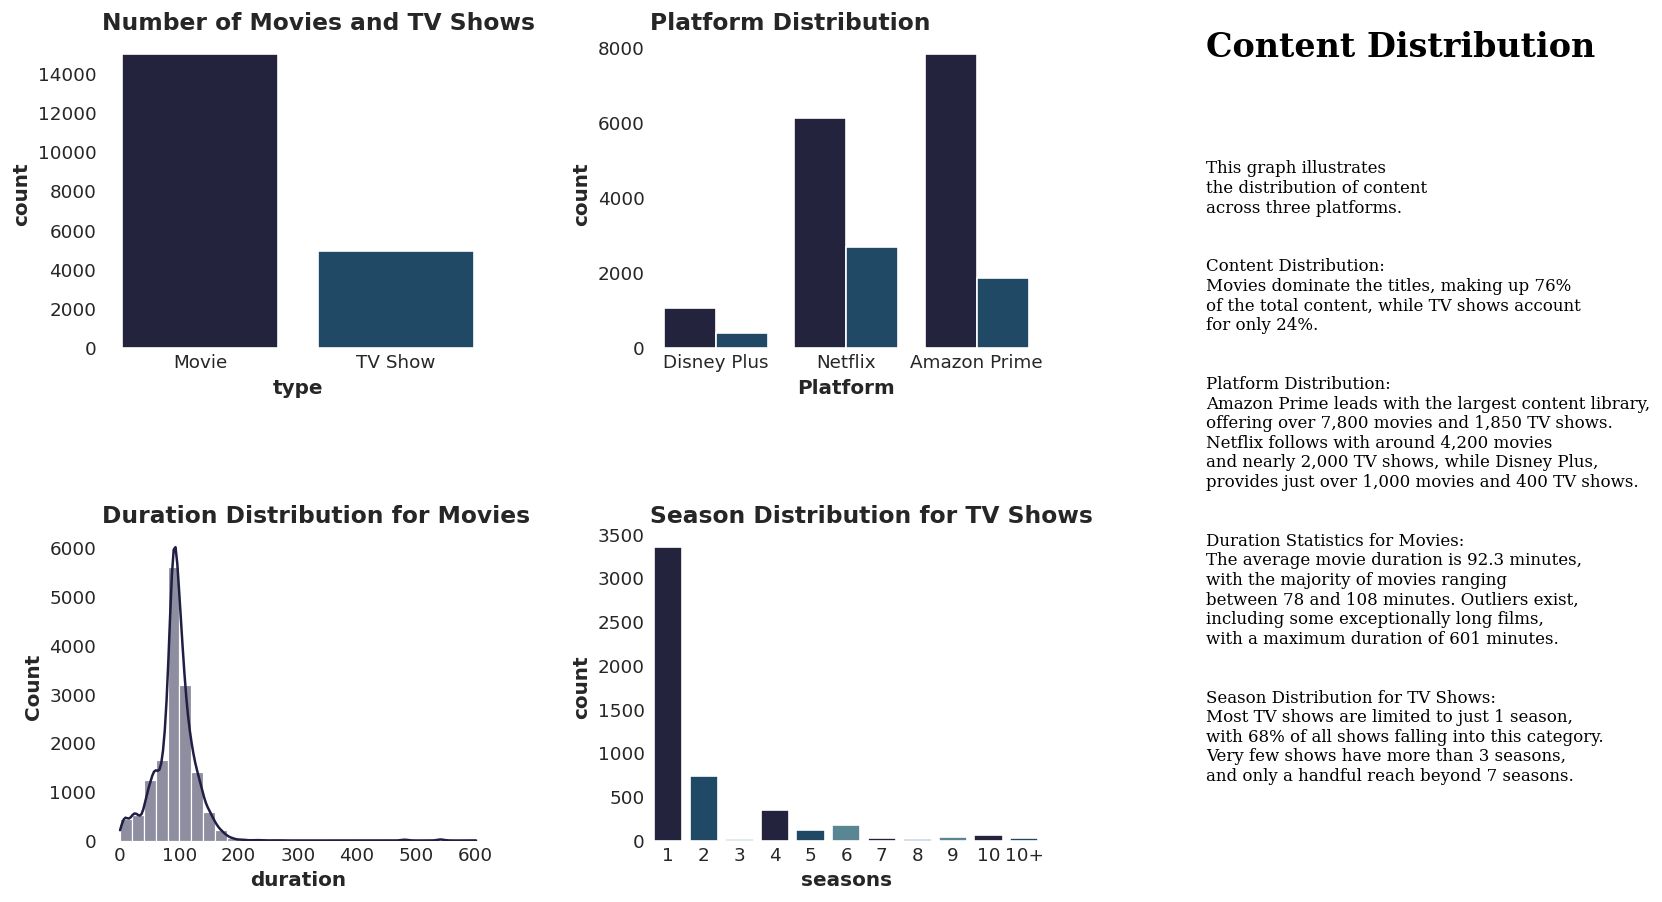

In [51]:
fig = plt.figure(figsize=(16, 14), dpi=120)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)

# Plot 1: Number of Movies and TV Shows
ax0 = fig.add_subplot(gs[0, 0])
sns.countplot(x='type', data=df_mutual, palette=[color_palette[0], color_palette[1]], ax=ax0)
ax0.set_title('Number of Movies and TV Shows', fontsize=14, fontweight='bold', loc='left')

# Plot 2: Platform Distribution (Updated to include Amazon Prime)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='Platform', hue='type', data=df_mutual, palette=color_palette, ax=ax1)
ax1.legend_.remove()
ax1.set_xticklabels(['Disney Plus', 'Netflix', 'Amazon Prime'], rotation=0)
ax1.set_title('Platform Distribution', fontsize=14, fontweight='bold', loc='left')

# Plot 3: Duration Distribution for Movies
ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(df_mutual[df_mutual['type'] == 'Movie']['duration'], bins=30, color=color_palette[0], ax=ax2, kde=True)
ax2.set_title('Duration Distribution for Movies', fontsize=14, fontweight='bold', loc='left')

# Plot 4: Season Distribution for TV Shows
df_mutual['seasons'] = df_mutual['season'].apply(lambda x: x if x <= 10 else '10+')
ax3 = fig.add_subplot(gs[1, 1])
sns.countplot(x='seasons', data=df_mutual[df_mutual['type'] == 'TV Show'], palette=color_palette, ax=ax3)
ax3.set_title('Season Distribution for TV Shows', fontsize=14, fontweight='bold', loc='left')
ax3.set_xticklabels([str(i) for i in range(1, 11)] + ['10+'])

fig.text(0.7, 0.87, 'Content Distribution', fontsize=20, fontweight='bold', fontfamily='serif', color=text_color)
fig.text(0.7, 0.82, '''
This graph illustrates
the distribution of content
across three platforms.


Content Distribution:
Movies dominate the titles, making up 76%
of the total content, while TV shows account
for only 24%.


Platform Distribution:
Amazon Prime leads with the largest content library,
offering over 7,800 movies and 1,850 TV shows.
Netflix follows with around 4,200 movies
and nearly 2,000 TV shows, while Disney Plus,
provides just over 1,000 movies and 400 TV shows.


Duration Statistics for Movies:
The average movie duration is 92.3 minutes,
with the majority of movies ranging
between 78 and 108 minutes. Outliers exist,
including some exceptionally long films,
with a maximum duration of 601 minutes.


Season Distribution for TV Shows:
Most TV shows are limited to just 1 season,
with 68% of all shows falling into this category.
Very few shows have more than 3 seasons,
and only a handful reach beyond 7 seasons.
''', fontsize=10, fontweight='light', fontfamily='serif', color=text_color, ha='left', va='top')

for ax in [ax0, ax1, ax2, ax3]:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.label.set_fontweight('bold')
    ax.yaxis.label.set_fontweight('bold')

plt.tight_layout()
plt.show()


#### Key Insights:

1. **Movies vs. TV Shows**:
   - **Movies dominate** with **13,131 entries** (76%), while **TV shows** make up **4,221 entries** (24%).

2. **Platform Distribution**:
   - **Amazon Prime** leads with **7,814 movies** and **1,854 TV shows**.
   - **Netflix** follows with **4,265 movies** and **1,969 TV shows**.
   - **Disney Plus** offers fewer, with **1,052 movies** and **398 TV shows**.

3. **Movie Duration**:
   - **Average movie duration** is **92.3 minutes**.
   - Most movies fall between **78 and 108 minutes**.
   
4. **TV Show Seasons**:
   - Majority of TV shows (**68%**) have **1 season**.
   - Few shows extend beyond **3 seasons**.


<ipython-input-52-b8c65d5332c1>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.pcolormesh(np.zeros_like(ct_content_platform), cmap=plt.cm.get_cmap('viridis', 6))


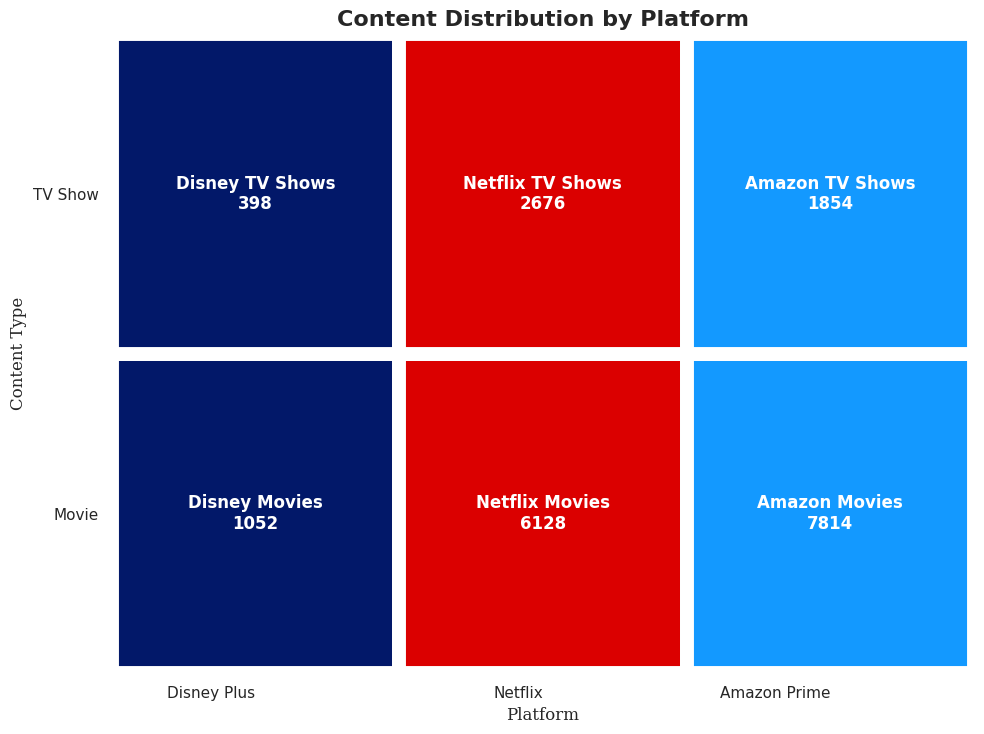

In [52]:
import numpy as np

ct_content_platform = pd.crosstab(df_mutual['type'], df_mutual['Platform'], margins=False)

fig, ax = plt.subplots(figsize=(10, 7.5), dpi=100)
fig.patch.set_facecolor(background_color)

annot = []
for i in range(ct_content_platform.shape[0]):
    row = []
    for j in range(ct_content_platform.shape[1]):
        if i == 0 and j == 0:
            row.append(f"Disney Movies\n{ct_content_platform.values[i][j]}")
        elif i == 0 and j == 1:
            row.append(f"Netflix Movies\n{ct_content_platform.values[i][j]}")
        elif i == 0 and j == 2:
            row.append(f"Amazon Movies\n{ct_content_platform.values[i][j]}")
        elif i == 1 and j == 0:
            row.append(f"Disney TV Shows\n{ct_content_platform.values[i][j]}")
        elif i == 1 and j == 1:
            row.append(f"Netflix TV Shows\n{ct_content_platform.values[i][j]}")
        elif i == 1 and j == 2:
            row.append(f"Amazon TV Shows\n{ct_content_platform.values[i][j]}")
    annot.append(row)

colors = np.array([
    [color_disney, color_netflix, color_amazon],
    [color_disney, color_netflix, color_amazon]
])

ax.pcolormesh(np.zeros_like(ct_content_platform), cmap=plt.cm.get_cmap('viridis', 6))

for i in range(ct_content_platform.shape[0]):
    for j in range(ct_content_platform.shape[1]):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=colors[i, j], edgecolor='white', lw=10))
        ax.text(j + 0.5, i + 0.5, annot[i][j], ha='center', va='center', fontsize=12, color='white',
               weight ='bold')

ax.set_facecolor(background_color)
ax.set_xlabel("Platform", fontfamily='serif', fontsize=12)
ax.set_ylabel("Content Type", fontfamily='serif', fontsize=12)

ax.set_xticks(np.arange(ct_content_platform.shape[1]) + 0.5)
ax.set_yticks(np.arange(ct_content_platform.shape[0]) + 0.5)
ax.set_xticklabels(['Disney Plus', 'Netflix', 'Amazon Prime'], rotation=0, ha='right')
ax.set_yticklabels(['Movie', 'TV Show'], rotation=0)

ax.set_title('Content Distribution by Platform', fontsize=16, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


### Countries that produce more movies

In [53]:
df_filtered = df_mutual[df_mutual['country'] != 'Unknown']

df_exploded = df_filtered.assign(country=df_filtered['country'].str.split(', ')).explode('country')

country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_movies']

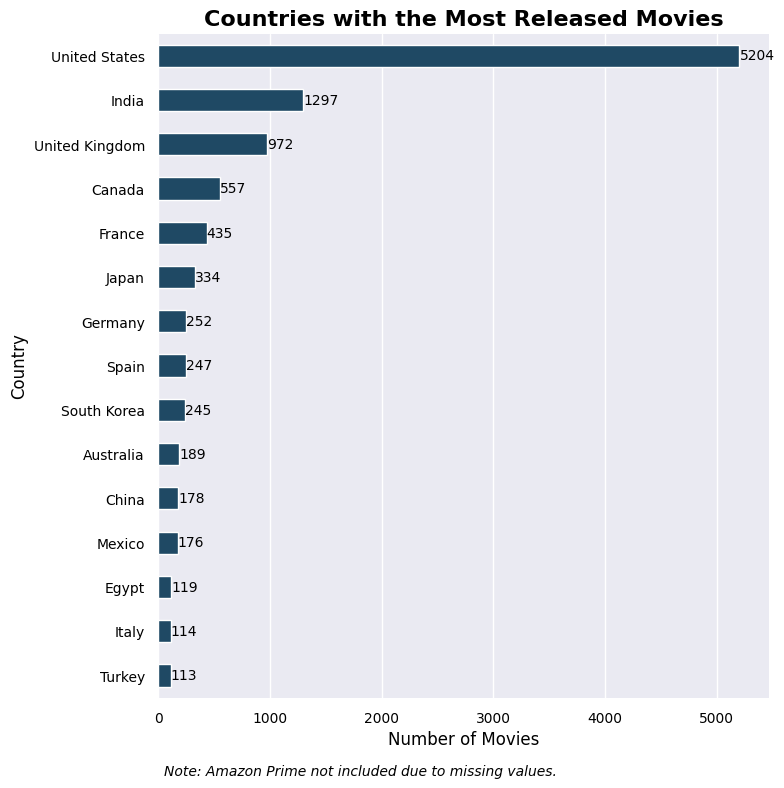

In [54]:
df_filtered = df_mutual[df_mutual['country'] != 'Unknown']

df_exploded = df_filtered.assign(country=df_filtered['country'].str.split(', ')).explode('country')

country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_movies']

top_fifteen_countries = country_counts.head(15)


fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor(background_color)

bar_color = color_palette[1]
sns.barplot(data=top_fifteen_countries, y="Country", x="Number_of_movies", color=bar_color, ax=ax, width=0.5)

ax.set_title("Countries with the Most Released Movies", fontsize=16, fontweight='bold', color=text_color)
ax.set_xlabel("Number of Movies", fontsize=12, color=text_color)
ax.set_ylabel("Country", fontsize=12, color=text_color)

ax.tick_params(axis='y', labelsize=10, colors=text_color)
ax.tick_params(axis='x', labelsize=10, colors=text_color)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, color=text_color)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.annotate('Note: Amazon Prime not included due to missing values.',
            xy=(0.01, -0.1), xycoords='axes fraction',
            ha='left', va='top', fontsize=10, color=text_color, fontstyle='italic')


plt.tight_layout()
plt.show()


In [55]:
df_exploded = df_filtered.assign(country=df_filtered['country'].str.split(', ')).explode('country')

country_platform_counts = df_exploded.groupby(['country', 'Platform']).size().unstack(fill_value=0).reset_index()
country_platform_counts.columns.name = None  # Remove the name of the columns
country_platform_counts.columns = ['country', 'Disney Plus (0)', 'Netflix (1)', 'Amazon Prime(2)']
country_platform_counts['Total_Movies'] = country_platform_counts['Disney Plus (0)'] + country_platform_counts['Netflix (1)']

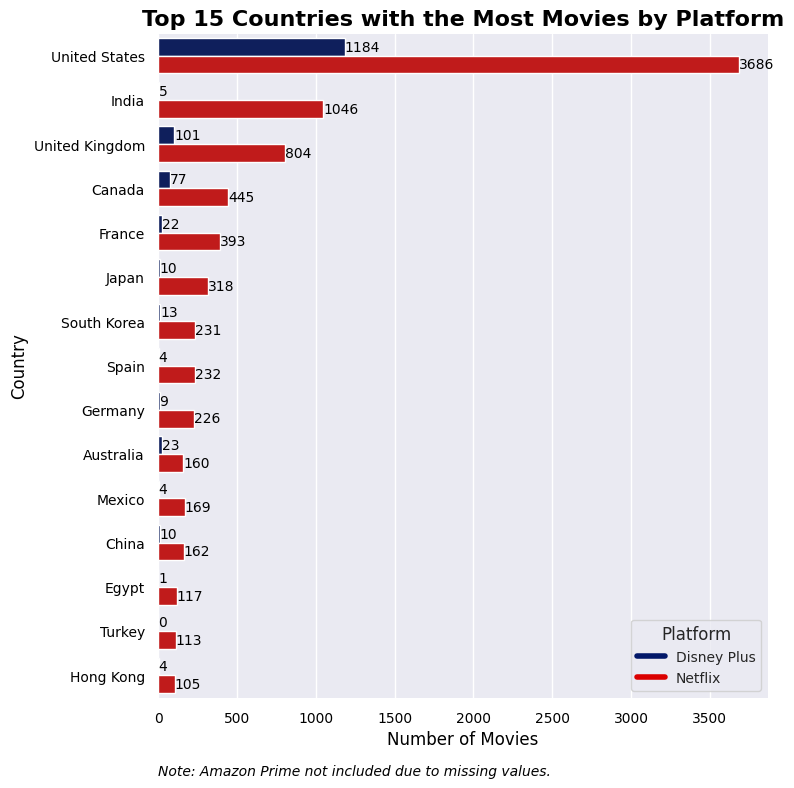

In [56]:
top_fifteen_countries = country_platform_counts.nlargest(15, 'Total_Movies')

fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor(background_color)

top_fifteen_melted = top_fifteen_countries.melt(id_vars='country',
                                                  value_vars=['Disney Plus (0)', 'Netflix (1)'],
                                                  var_name='Platform',
                                                  value_name='Number_of_movies')

sns.barplot(data=top_fifteen_melted, y='country', x='Number_of_movies', hue='Platform',
            palette=[color_disney, color_netflix], ax=ax, dodge=True)

ax.set_title("Top 15 Countries with the Most Movies by Platform", fontsize=16, fontweight='bold', color=text_color)
ax.set_xlabel("Number of Movies", fontsize=12, color=text_color)
ax.set_ylabel("Country", fontsize=12, color=text_color)

ax.tick_params(axis='y', labelsize=10, colors=text_color)
ax.tick_params(axis='x', labelsize=10, colors=text_color)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, color=text_color)

for spine in ax.spines.values():
    spine.set_visible(False)

legend_elements = [Line2D([0], [0], color=color_disney, lw=4, label='Disney Plus'),
                   Line2D([0], [0], color=color_netflix, lw=4, label='Netflix')]

ax.legend(handles=legend_elements, title='Platform', fontsize=10, loc='lower right', title_fontsize='12')
ax.annotate('Note: Amazon Prime not included due to missing values.',
            xy=(0.0, -0.1), xycoords='axes fraction',
            ha='left', va='top', fontsize=10, color=text_color, fontstyle='italic')


plt.tight_layout()
plt.show()

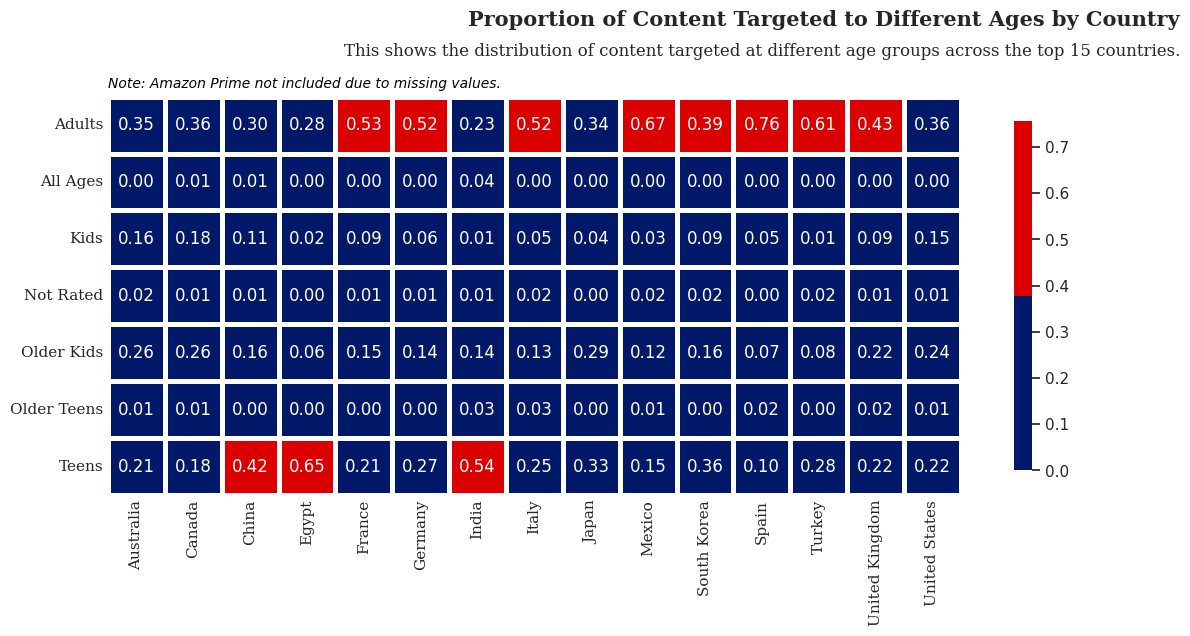

In [57]:
df_filtered = df_mutual[(df_mutual['country'] != 'Unknown') & (df_mutual['rating'] != 'Not Rated')]

df_exploded = df_filtered.assign(country=df_filtered['country'].str.split(', ')).explode('country')

country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_movies']
top_fifteen_countries = country_counts.head(15)

df_top_countries = df_exploded[df_exploded['country'].isin(top_fifteen_countries['Country'])]

df_heatmap = pd.crosstab(df_top_countries['target_ages'], df_top_countries['country'], normalize='columns')


custom_cmap = sns.color_palette([color_disney, color_netflix])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.heatmap(df_heatmap, cmap=custom_cmap, square=True, linewidth=2.5, cbar_kws={'shrink': 0.3},
            annot=True, fmt='.2f', ax=ax, annot_kws={"fontsize":12})

fig.text(.99, .725, 'Proportion of Content Targeted to Different Ages by Country', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')
fig.text(0.99, 0.7, 'This shows the distribution of content targeted at different age groups across the top 15 countries.', ha='right', fontsize=12, fontfamily='serif')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.annotate('Note: Amazon Prime not included due to missing values.',
            xy=(0.0, 1.05), xycoords='axes fraction',
            ha='left', va='top', fontsize=10, color=text_color, fontstyle='italic')
plt.tight_layout()
plt.show()


#### General Observations:
1. **Adults**: Many countries have a significant portion of content targeted toward adults. Notably, **France**, **Germany**, **Hong Kong**, **Mexico**, and **Spain** have the highest proportions of adult-targeted content.
2. **Kids**: Content for kids tends to be smaller in most countries. However, **Canada** and **Australia** have a relatively larger proportion of kid-targeted content, while **Turkey** and **Spain** have very little content aimed at kids.
3. **Older Kids**: Countries like **Canada**, **Australia**, and the **United States** show a notable amount of content aimed at older kids, while **Spain**, **Turkey**, and **Mexico** focus less on this age group.
4. **Teens**: Teen-targeted content is particularly prominent in **India**, **Japan**, and **South Korea**, where more than 40% of content is directed at teens. Conversely, **Germany** and **Mexico** show much lower proportions of teen-focused content.


#### Country-Specific Insights:
- **France** and **Germany** lead with the highest proportions of adult content, with **48%** and **45%** respectively.
- **India** stands out with **52%** of its content targeted toward teens, reflecting a strong focus on younger audiences.
- **Mexico** has **57%** of its content aimed at adults, while content for kids is just **3.7%**, indicating a preference for older audience content.
- **Spain** is another example with **64%** of its content targeted at adults, with minimal content for younger viewers.
- **United States** and **United Kingdom** display a more balanced approach, with content for all age groups, showing an effort to cater to a broad audience.

### Cast Analysis

In [58]:
df_exploded_actors = df_mutual.assign(cast=df_mutual['cast'].str.split(', ')).explode('cast')

df_exploded_actors = df_exploded_actors[
    (~df_exploded_actors['cast'].str.contains('Test Actor')) &  # Exclude actors containing 'Test Actor'
    (~df_exploded_actors['cast'].isin(['Unknown'])) &  # Exclude 'Unknown' actors
    (df_exploded_actors['cast'].str.len() >= 3)  # Exclude names shorter than 3 characters
]

df_exploded_actors = df_exploded_actors[df_exploded_actors['cast'].str.match(r'^[A-Za-z\s]+$')]

actor_counts = df_exploded_actors['cast'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number_of_movies']


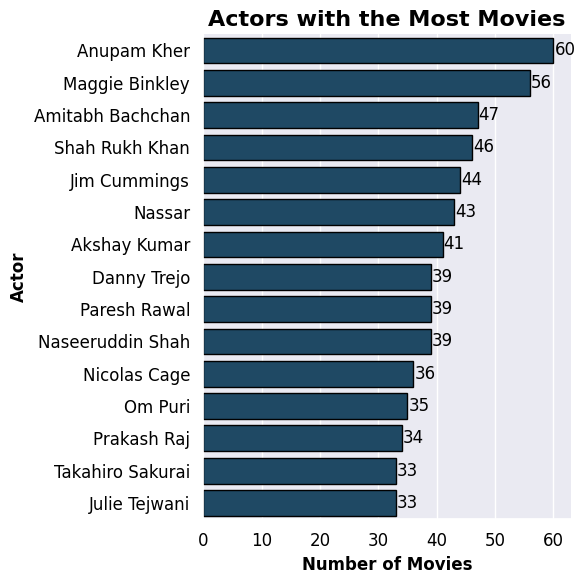

In [59]:
fifteen = actor_counts.head(15)

bar_color = color_mutual

fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor(background_color)

sns.barplot(data=fifteen, y="Actor", x="Number_of_movies", color=bar_color, ax=ax, edgecolor='black')

ax.set_title("Actors with the Most Movies", fontsize=16, fontweight='bold', color=text_color)
ax.set_xlabel("Number of Movies", fontsize=12, color=text_color, fontweight = 'bold')
ax.set_ylabel("Actor", fontsize=12, fontweight = 'bold', color=text_color)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center',
                va='center',
                fontsize=12,
                color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', labelsize=12, colors=text_color)
ax.tick_params(axis='x', labelsize=12, colors=text_color)

plt.tight_layout()
plt.show()

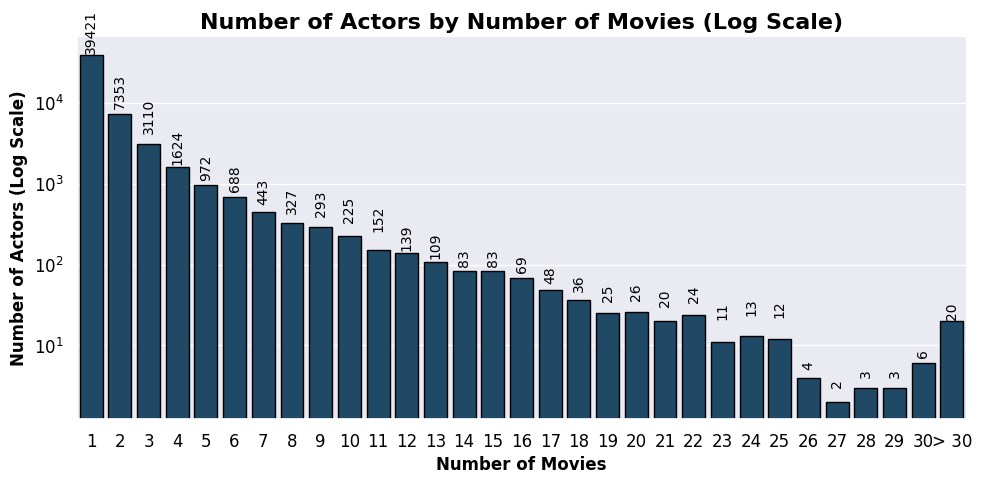

In [60]:
actor_counts['Number_of_movies_grouped'] = actor_counts['Number_of_movies'].apply(lambda x: str(x) if x <= 30 else '> 30')
movie_group_counts = actor_counts.groupby('Number_of_movies_grouped').size().reset_index(name='Number_of_actors')

movie_group_counts['Number_of_movies_grouped'] = pd.Categorical(movie_group_counts['Number_of_movies_grouped'],
                                                                categories=[str(i) for i in range(1, 31)] + ['> 30'],
                                                                ordered=True)

movie_group_counts = movie_group_counts.sort_values('Number_of_movies_grouped')

bar_color = color_mutual

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor(background_color)

# Plot with movies on the x-axis and actors on the y-axis with a logarithmic scale for y-axis
sns.barplot(data=movie_group_counts, x="Number_of_movies_grouped", y="Number_of_actors", color=bar_color, ax=ax, edgecolor='black')

# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

ax.set_title("Number of Actors by Number of Movies (Log Scale)", fontsize=16, fontweight='bold', color=text_color)
ax.set_xlabel("Number of Movies", fontsize=12, color=text_color, fontweight='bold')
ax.set_ylabel("Number of Actors (Log Scale)", fontsize=12, fontweight='bold', color=text_color)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    if not pd.isna(height):
        if i <= 2:
            # Lift the first annotation by 500 units
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height + 1100-(10*i)),
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='black',
                        rotation=90)
        elif i <= 10:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height+100),
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='black',
                        rotation=90)
        elif i <= 24:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height+10),
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='black',
                        rotation=90)
        else:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height+1),
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='black',
                        rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=12, colors=text_color)
ax.tick_params(axis='y', labelsize=12, colors=text_color)

plt.tight_layout()
plt.show()

### Release Year Exploration


<ipython-input-61-a424f4e45903>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


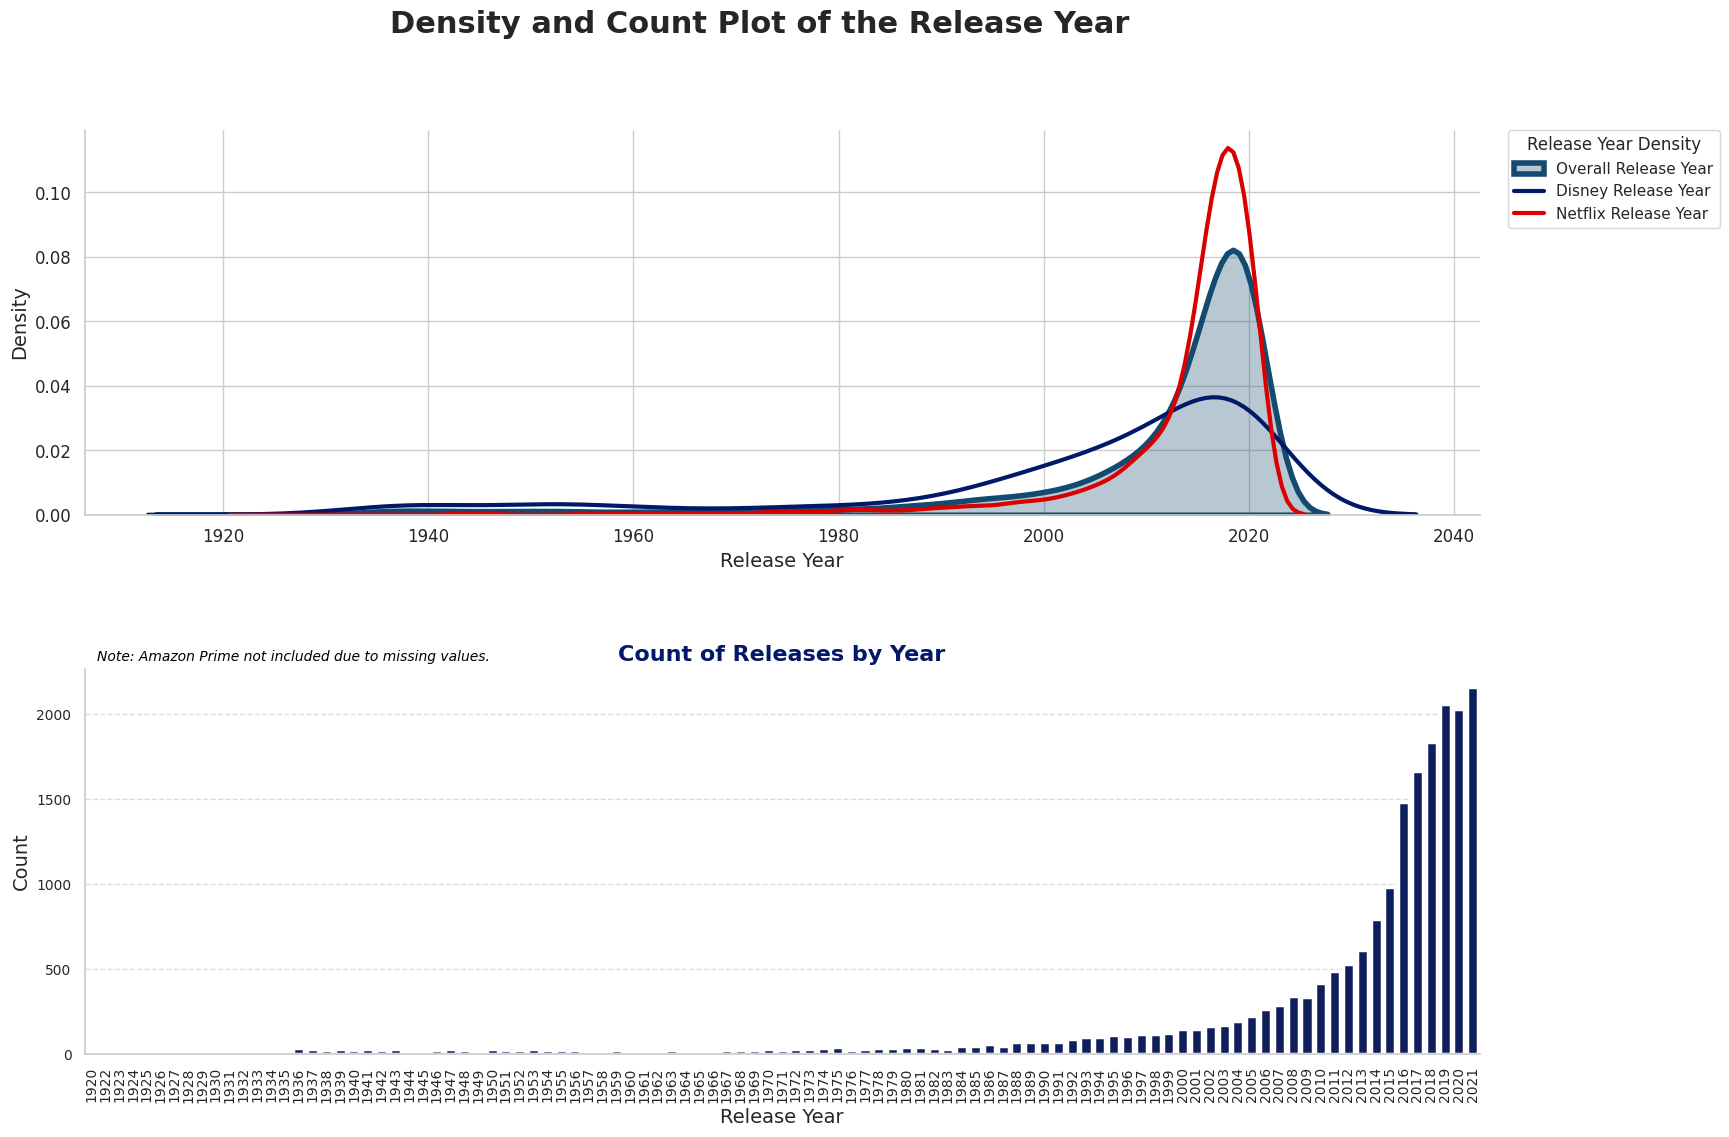

In [61]:
sns.set(style="whitegrid", rc={'figure.figsize': (18, 12)})

fig, (ax_kde1, ax_cnt2) = plt.subplots(2, figsize=(18, 12), gridspec_kw={'hspace': 0.4})
fig.suptitle('Density and Count Plot of the Release Year', fontsize=22, fontweight='bold')



sns.kdeplot(df_mutual["release_year"],
            alpha=0.3,
            linewidth=4,
            fill=True,
            color=color_mutual,
            label="Overall Release Year",
            ax=ax_kde1)

sns.kdeplot(df_mutual[df_mutual["Platform"] == 0]["release_year"],
            alpha=1,
            linewidth=3,
            color=color_disney,
            label="Disney Release Year",
            ax=ax_kde1)

sns.kdeplot(df_mutual[df_mutual["Platform"] == 1]["release_year"],
            alpha=1,
            linewidth=3,
            color=color_netflix,
            label="Netflix Release Year",
            ax=ax_kde1)

ax_kde1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Release Year Density')
ax_kde1.set_xlabel('Release Year', fontsize=14)
ax_kde1.set_ylabel('Density', fontsize=14)
ax_kde1.tick_params(axis='both', labelsize=12)

sns.countplot(x="release_year",
              data=df_mutual,
              linewidth=2.5,
              color=color_disney,
              ax=ax_cnt2)

ax_cnt2.set_title('Count of Releases by Year', fontsize=16, fontweight='bold', color=color_disney)
ax_cnt2.set_xlabel('Release Year', fontsize=14)
ax_cnt2.set_ylabel('Count', fontsize=14)
ax_cnt2.tick_params(axis='x', rotation=90, labelsize=10)
ax_cnt2.tick_params(axis='y', labelsize=10)

years = range(df_mutual["release_year"].min(), df_mutual["release_year"].max() + 1, 5)

ax_cnt2.grid(axis='y', linestyle='--', alpha=0.7)

ax_kde1.spines['top'].set_visible(False)
ax_kde1.spines['right'].set_visible(False)
ax_cnt2.spines['top'].set_visible(False)
ax_cnt2.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(hspace=0.4)
plt.annotate('Note: Amazon Prime not included due to missing values.',
            xy=(0.15, 1.05), xycoords='axes fraction',
            ha='center', va='top', fontsize=10, color=text_color, fontstyle='italic')

plt.show()


##### Conclusions

**Release Year Range:** The release years of these movies range from 1925 to 2021, indicating a wide historical coverage of cinematic releases.

**Mean Release Year:** The average release year of movies in the dataset is approximately 2011.42, suggesting that most movies are more recent, with a significant concentration in the last few decades.

**Most Common Release Year:** The year 2018 stands out as the most common release year, with 1,128 movies released. This spike indicates that 2018 was a particularly prolific year for movie production.

**Yearly Counts:** The count of movie releases per year shows a trend towards increasing production, particularly noticeable in the years 2016 to 2019, where annual counts consistently exceed 800 releases. This trend may reflect the growing demand for content from streaming platforms and a general increase in movie production capacity.

**Historical Context:** The presence of movies from earlier decades, including as far back as 1925, offers valuable insights into the evolution of cinema over time, though the frequency of releases significantly increases in the 21st century.


### Date Added

<ipython-input-62-3d0888403b72>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_sub_disney = df_mutual[df_mutual['Platform'] == 'Disney Plus'].groupby('month_name_added')['month_name_added'].count().cumsum()
<ipython-input-62-3d0888403b72>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_sub_netflix = df_mutual[df_mutual['Platform'] == 'Netflix'].groupby('month_name_added')['month_name_added'].count().cumsum()
<ipython-input-62-3d0888403b72>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

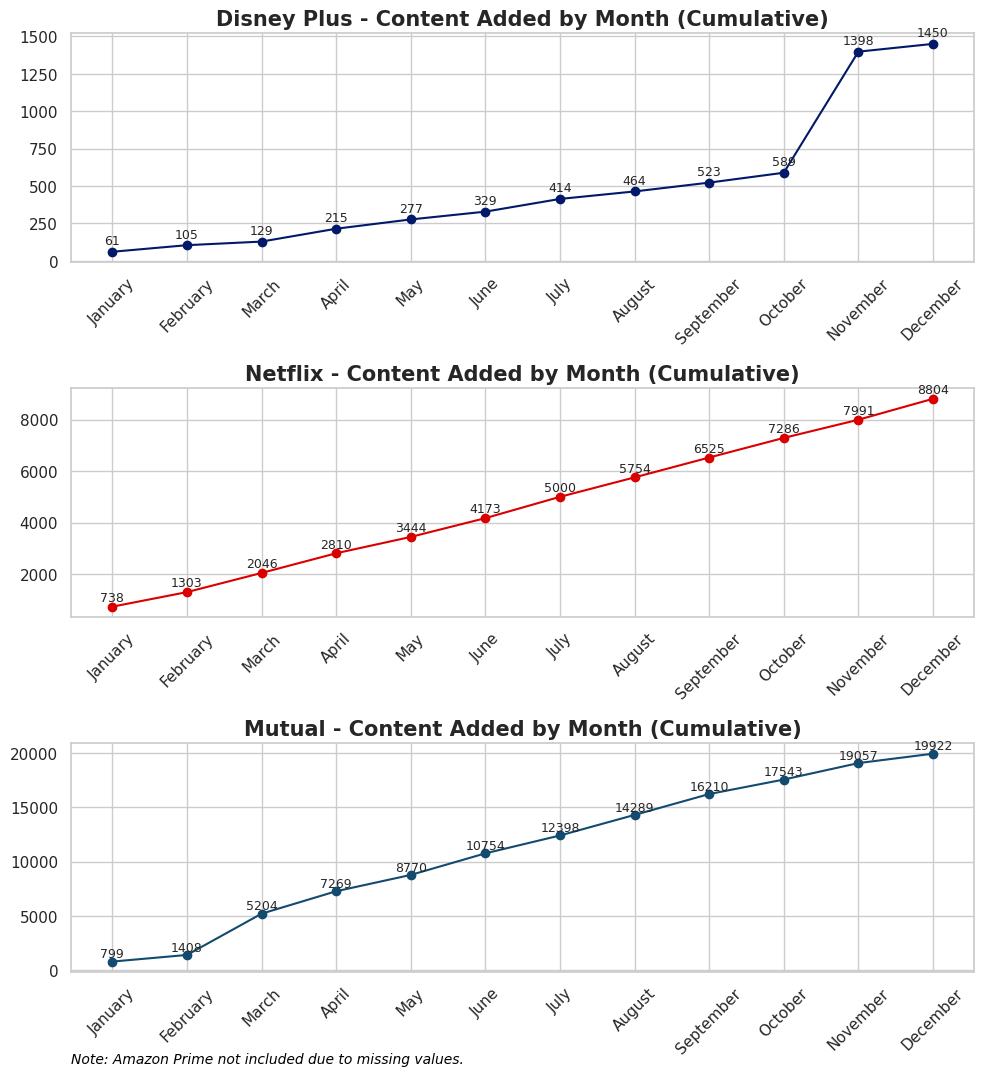

In [62]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_mutual['month_name_added'] = df_mutual['date_added'].dt.strftime('%B')
df_mutual['month_name_added'] = pd.Categorical(df_mutual['month_name_added'], categories=month_order, ordered=True)

platform_mapping = {0: 'Disney Plus', 1: 'Netflix'}
df_mutual['Platform'] = df_mutual['Platform'].replace(platform_mapping)

df_mutual['Platform_combined'] = 'Mutual'
df_combined = df_mutual.copy()

data_sub_disney = df_mutual[df_mutual['Platform'] == 'Disney Plus'].groupby('month_name_added')['month_name_added'].count().cumsum()
data_sub_netflix = df_mutual[df_mutual['Platform'] == 'Netflix'].groupby('month_name_added')['month_name_added'].count().cumsum()
data_sub_combined = df_combined.groupby('month_name_added')['month_name_added'].count().cumsum()


fig, axes = plt.subplots(3, 1, figsize=(10, 11))

axes[0].plot(data_sub_disney.index, data_sub_disney, color=color_disney, marker='o', label='Disney Plus')
axes[0].set_title('Disney Plus - Content Added by Month (Cumulative)', fontsize=15, fontweight='bold')
for i, value in enumerate(data_sub_disney):
    axes[0].text(i, value + 30, str(int(value)), ha='center', va='bottom', fontsize=9)
axes[0].set_xticks(range(len(month_order)))
axes[0].set_xticklabels(month_order, rotation=45)

axes[1].plot(data_sub_netflix.index, data_sub_netflix, color=color_netflix, marker='o', label='Netflix')
axes[1].set_title('Netflix - Content Added by Month (Cumulative)', fontsize=15, fontweight='bold')
for i, value in enumerate(data_sub_netflix):
    axes[1].text(i, value + 100, str(int(value)), ha='center', va='bottom', fontsize=9)
axes[1].set_xticks(range(len(month_order)))
axes[1].set_xticklabels(month_order, rotation=45)

axes[2].plot(data_sub_combined.index, data_sub_combined, color=color_mutual, marker='o', label='Mutual')
axes[2].set_title('Mutual - Content Added by Month (Cumulative)', fontsize=15, fontweight='bold')
for i, value in enumerate(data_sub_combined):
    axes[2].text(i, value + 100, str(int(value)), ha='center', va='bottom', fontsize=9)
axes[2].set_xticks(range(len(month_order)))
axes[2].set_xticklabels(month_order, rotation=45)

plt.annotate('Note: Amazon Prime not included due to missing values.',
            xy=(0.0, -0.35), xycoords='axes fraction',
            ha='left', va='top', fontsize=10, color=text_color, fontstyle='italic')

plt.tight_layout()
plt.show()


---

#### **Disney Plus**
- **Slow Start in Early Months**: Disney Plus begins with relatively few content additions in the early part of the year, with only **61 titles** added in **January**. By **April**, the cumulative number of titles rises to **215**, showing some acceleration in content additions by spring.
- **Significant Increase in Late Fall**: A major jump occurs in **November** and **December**, where content jumps from **589** titles in October to **1398** in November, nearly doubling. By **December**, the cumulative content reaches **1450 titles**.
- **Conclusion**: Disney Plus tends to release a substantial amount of content toward the end of the year, likely preparing for the holiday season when viewership peaks.

---

#### **Netflix**
- **Consistent Growth Throughout the Year**: Netflix shows steady growth throughout the year, starting with **738 titles** in **January** and reaching **2046 titles** by **March**, more than doubling the amount in just two months.
- **Peak Growth Mid-Year**: The platform adds content consistently, with significant growth continuing through **July** (**5000 titles**) and **September** (**6525 titles**).
- **Strong Finish in December**: By the end of the year, Netflix has accumulated **8804 titles**, more than six times the cumulative content of Disney Plus.
- **Conclusion**: Netflix follows a steady content addition strategy, releasing a large volume of content throughout the year with no pronounced seasonal spikes, maintaining its reputation as a platform with continuous content updates.

---


#### Key Insights:
1. **Disney Plus Focuses on the Holiday Season**: A large portion of Disney Plus's content is added in the last two months of the year, indicating a content release strategy aligned with the holiday season.
2. **Netflix Adds Content Consistently**: Netflix shows consistent and heavy content additions throughout the year, with no specific spikes, making it a platform known for continuous content refresh.
3. **Combined Strategy Peaks Toward the End of the Year**: While Netflix maintains consistent growth, the addition of Disney Plus's end-of-year content boosts the combined numbers significantly in November and December.

This analysis reflects how both platforms, while adding content at different rates and times, combine to offer a robust library throughout the year, with notable increases in late fall and early winter.

### "rating" column

In [63]:
df_filtered.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,Platform,target_ages,seasons
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,0,Kids,0
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...,0,0,Teens,0
7,TV Show,Port Protection Alaska,Unknown,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,0,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,2,0,Teens,2
8,TV Show,Secrets of the Zoo: Tampa,Unknown,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,0,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,2,0,Older Kids,2
9,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...,0,0,Kids,0


In [64]:
disney_counts = df_filtered[df_filtered["Platform"] == 'Disney Plus']['rating'].value_counts()
disney_counts

,count
rating,


In [65]:
df_mutual['Platform'] = df_mutual['Platform'].replace(2, 'Amazon Prime')

<ipython-input-66-507d018f7e6a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), fontweight='bold')
<ipython-input-66-507d018f7e6a>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), fontweight='bold')
<ipython-input-66-507d018f7e6a>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), fontweight='bold')
<ipython-input-66-507d018f7e6a>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3, 0].set_xticklabels(axs[3, 0].get_xticklabels(), fontweight='bold')


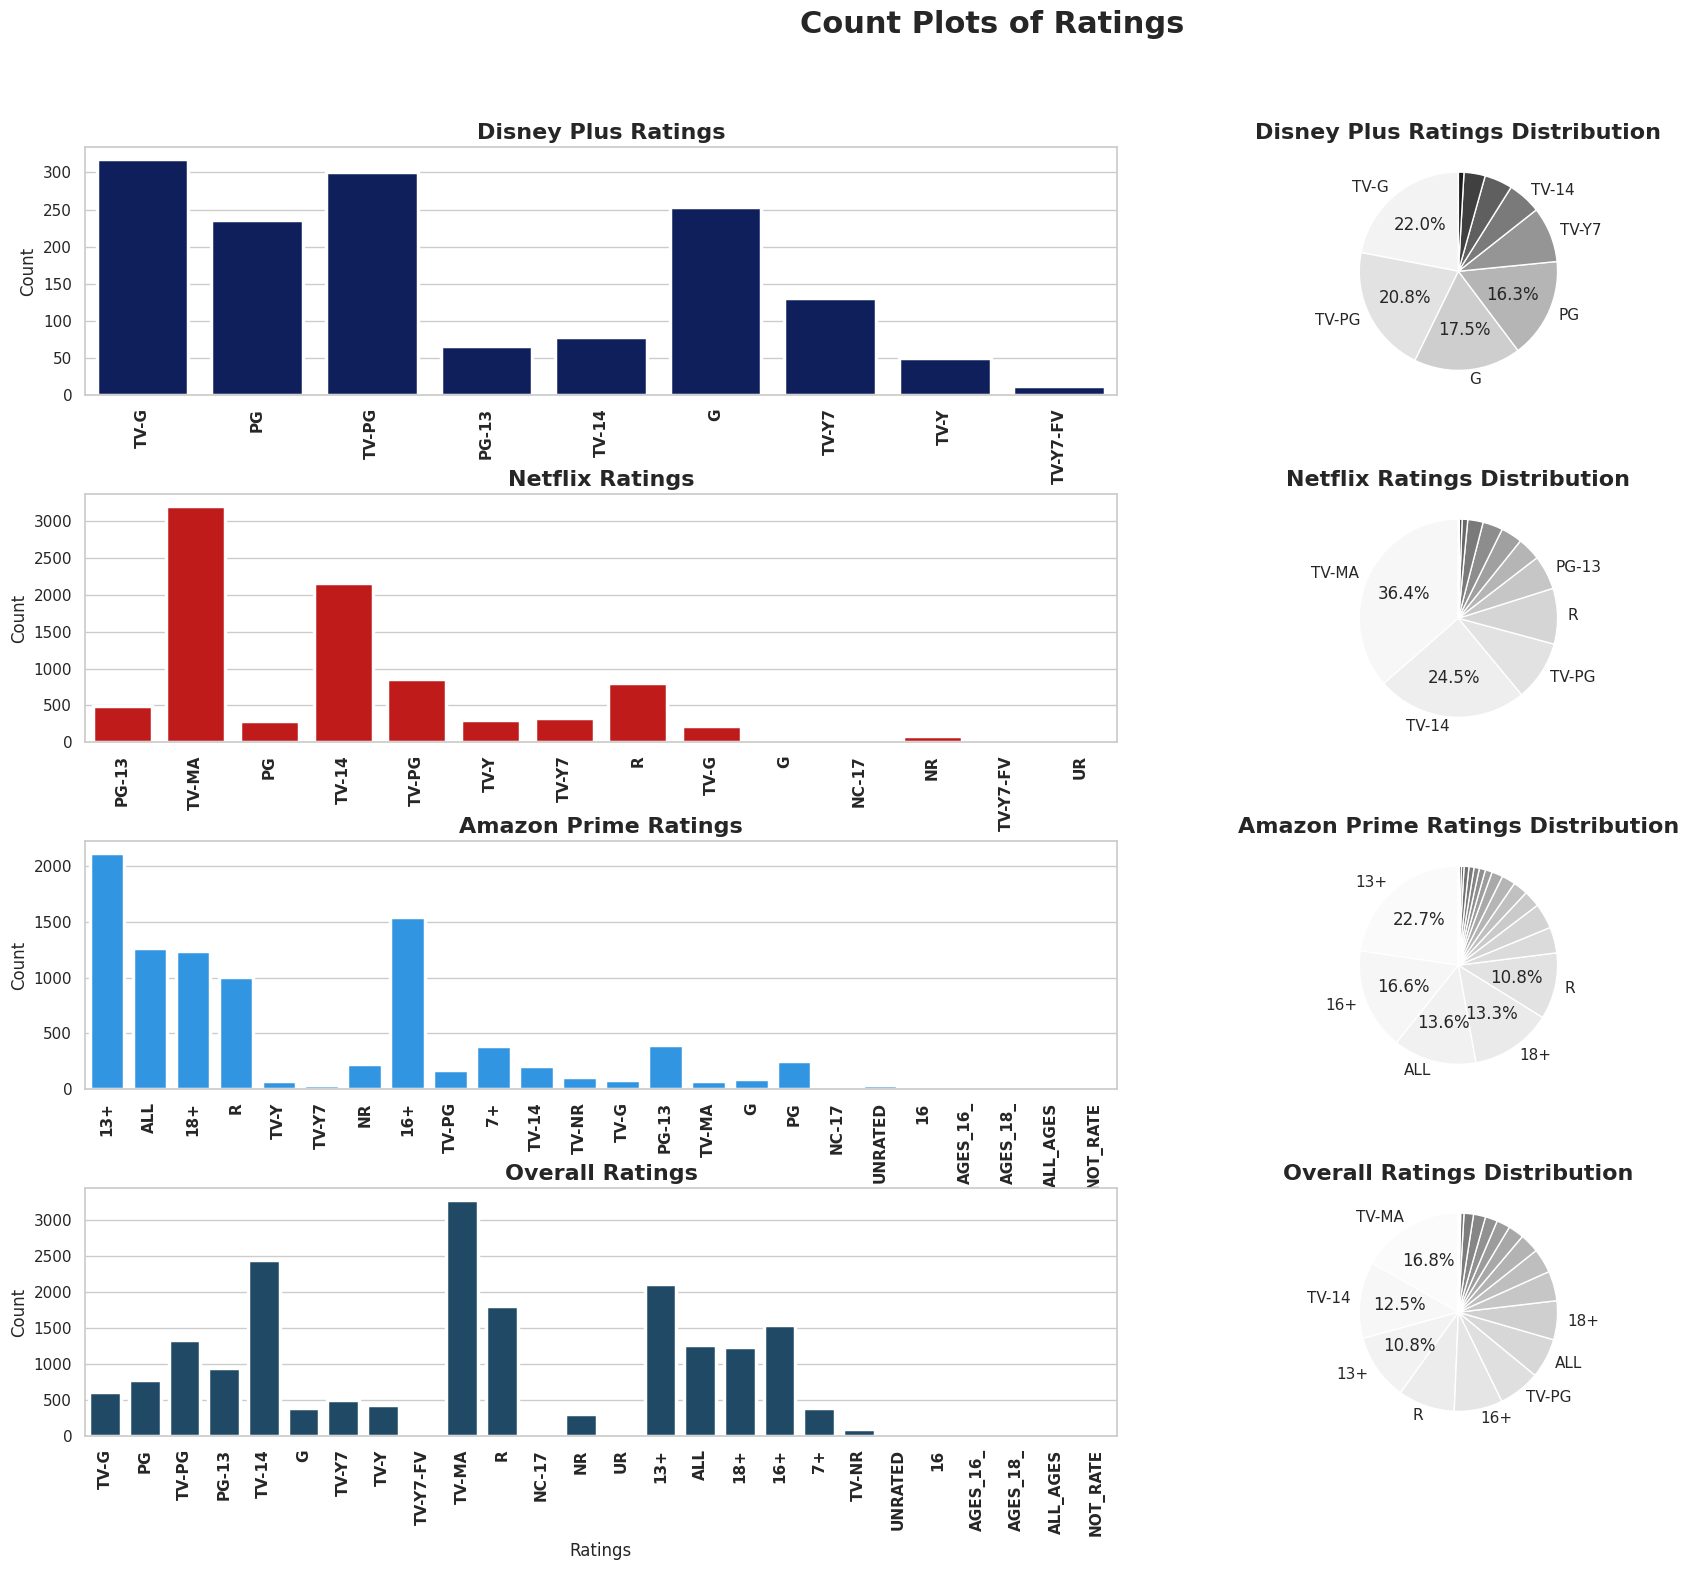

In [66]:
def plot_ratings_distribution(df_mutual, color_disney, color_netflix, color_amazon, color_mutual):
    df_filtered = df_mutual[df_mutual['rating'] != 'Not Rated']
    sns.set(style="whitegrid", rc={'figure.figsize': (20, 16)})

    fig, axs = plt.subplots(4, 2, figsize=(20, 16))
    fig.suptitle('Count Plots of Ratings', fontsize=22, fontweight='bold')

    # Disney Plus Count Plot
    sns.countplot(x="rating", data=df_filtered[df_filtered["Platform"] == 'Disney Plus'],
                  linewidth=2.5, color=color_disney, ax=axs[0, 0])
    axs[0, 0].set_title('Disney Plus Ratings', fontsize=16, fontweight='bold')
    axs[0, 0].set_xlabel('', fontsize=12)
    axs[0, 0].set_ylabel('Count', fontsize=12)
    axs[0, 0].tick_params(axis='x', labelrotation=90)
    axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), fontweight='bold')

    disney_counts = df_filtered[df_filtered["Platform"] == 'Disney Plus']['rating'].value_counts()
    disney_colors = sns.color_palette("Greys", n_colors=len(disney_counts))
    disney_labels = [label if count / sum(disney_counts) > 0.05 else '' for label, count in zip(disney_counts.index, disney_counts)]
    axs[0, 1].pie(disney_counts, labels=disney_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=disney_colors)
    axs[0, 1].set_title('Disney Plus Ratings Distribution', fontsize=16, fontweight='bold')

    # Netflix Count Plot
    sns.countplot(x="rating", data=df_filtered[df_filtered["Platform"] == 'Netflix'],
                  linewidth=2.5, color=color_netflix, ax=axs[1, 0])
    axs[1, 0].set_title('Netflix Ratings', fontsize=16, fontweight='bold')
    axs[1, 0].set_xlabel('', fontsize=12)
    axs[1, 0].set_ylabel('Count', fontsize=12)
    axs[1, 0].tick_params(axis='x', labelrotation=90)
    axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), fontweight='bold')

    netflix_counts = df_filtered[df_filtered["Platform"] == 'Netflix']['rating'].value_counts()
    netflix_colors = sns.color_palette("Greys", n_colors=len(netflix_counts))
    netflix_labels = [label if count / sum(netflix_counts) > 0.05 else '' for label, count in zip(netflix_counts.index, netflix_counts)]
    axs[1, 1].pie(netflix_counts, labels=netflix_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=netflix_colors)
    axs[1, 1].set_title('Netflix Ratings Distribution', fontsize=16, fontweight='bold')

    # Amazon Prime Count Plot
    sns.countplot(x="rating", data=df_filtered[df_filtered["Platform"] == 'Amazon Prime'],
                  linewidth=2.5, color=color_amazon, ax=axs[2, 0])
    axs[2, 0].set_title('Amazon Prime Ratings', fontsize=16, fontweight='bold')
    axs[2, 0].set_xlabel('', fontsize=12)
    axs[2, 0].set_ylabel('Count', fontsize=12)
    axs[2, 0].tick_params(axis='x', labelrotation=90)
    axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), fontweight='bold')

    amazon_counts = df_filtered[df_filtered["Platform"] == 'Amazon Prime']['rating'].value_counts()
    amazon_colors = sns.color_palette("Greys", n_colors=len(amazon_counts))
    amazon_labels = [label if count / sum(amazon_counts) > 0.05 else '' for label, count in zip(amazon_counts.index, amazon_counts)]
    axs[2, 1].pie(amazon_counts, labels=amazon_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=amazon_colors)
    axs[2, 1].set_title('Amazon Prime Ratings Distribution', fontsize=16, fontweight='bold')

    # Overall Count Plot
    sns.countplot(x="rating", data=df_filtered,
                  linewidth=2.5, color=color_mutual, ax=axs[3, 0])
    axs[3, 0].set_title('Overall Ratings', fontsize=16, fontweight='bold')
    axs[3, 0].set_xlabel('Ratings', fontsize=12)
    axs[3, 0].set_ylabel('Count', fontsize=12)
    axs[3, 0].tick_params(axis='x', labelrotation=90)
    axs[3, 0].set_xticklabels(axs[3, 0].get_xticklabels(), fontweight='bold')

    overall_counts = df_filtered['rating'].value_counts()
    overall_colors = sns.color_palette("Greys", n_colors=len(overall_counts))
    overall_labels = [label if count / sum(overall_counts) > 0.05 else '' for label, count in zip(overall_counts.index, overall_counts)]
    axs[3, 1].pie(overall_counts, labels=overall_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=overall_colors)
    axs[3, 1].set_title('Overall Ratings Distribution', fontsize=16, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.subplots_adjust(hspace=0.4)
    plt.show()

plot_ratings_distribution(df_mutual, color_disney, color_netflix, color_amazon, color_mutual)

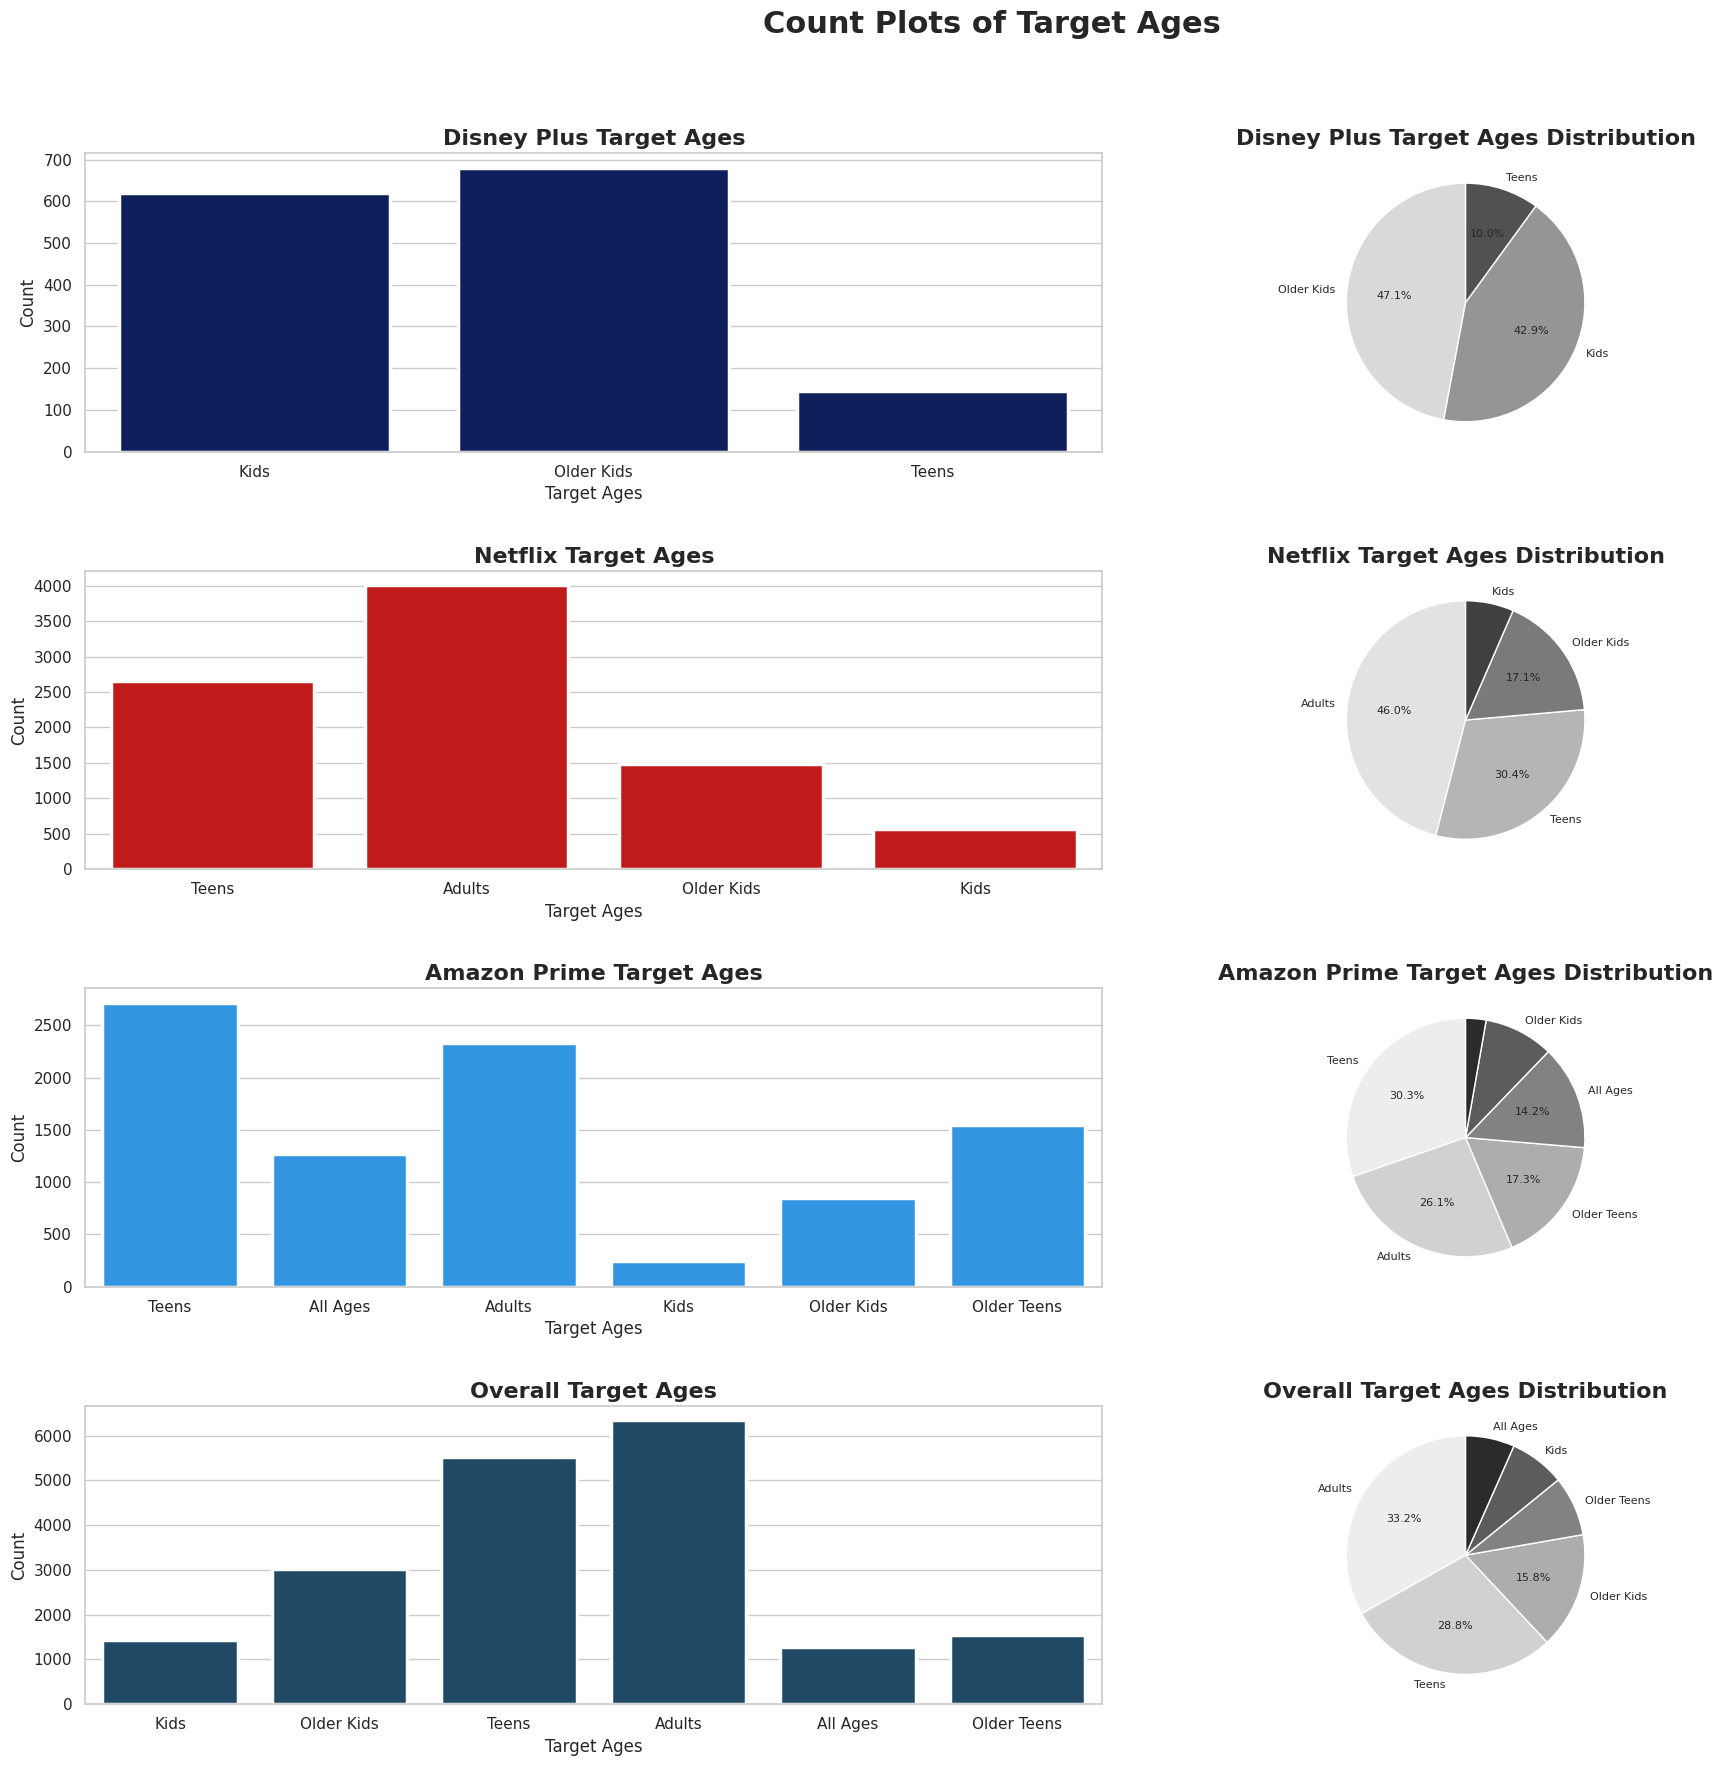

In [67]:
exclude_ratings = ['Not Rated', 'NR', 'UR', 'UNRATED', 'NOT_RATE', 'TV-NR']
df_filtered = df_mutual[~df_mutual['rating'].isin(exclude_ratings)]

sns.set(style="whitegrid", rc={'figure.figsize': (20, 18)})
fig, axs = plt.subplots(4, 2, figsize=(20, 18))
fig.suptitle('Count Plots of Target Ages', fontsize=22, fontweight='bold')

# Disney Plus Count Plot
sns.countplot(x="target_ages", data=df_filtered[df_filtered["Platform"] == 'Disney Plus'],
              linewidth=2.5, color=color_disney, ax=axs[0, 0])
axs[0, 0].set_title('Disney Plus Target Ages', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('Target Ages', fontsize=12)
axs[0, 0].set_ylabel('Count', fontsize=12)

disney_counts = df_filtered[df_filtered["Platform"] == 'Disney Plus']['target_ages'].value_counts()
disney_colors = sns.color_palette("Greys", n_colors=len(disney_counts))
disney_labels = [label if count / sum(disney_counts) > 0.05 else '' for label, count in zip(disney_counts.index, disney_counts)]
axs[0, 1].pie(disney_counts, labels=disney_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=disney_colors)
axs[0, 1].set_title('Disney Plus Target Ages Distribution', fontsize=16, fontweight='bold')

for text in axs[0, 1].texts:
    text.set_fontsize(8)
for p in axs[0, 1].patches:
    p.set_edgecolor('w')

# Netflix Count Plot
sns.countplot(x="target_ages", data=df_filtered[df_filtered["Platform"] == 'Netflix'],
              linewidth=2.5, color=color_netflix, ax=axs[1, 0])
axs[1, 0].set_title('Netflix Target Ages', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('Target Ages', fontsize=12)
axs[1, 0].set_ylabel('Count', fontsize=12)

netflix_counts = df_filtered[df_filtered["Platform"] == 'Netflix']['target_ages'].value_counts()
netflix_colors = sns.color_palette("Greys", n_colors=len(netflix_counts))
netflix_labels = [label if count / sum(netflix_counts) > 0.05 else '' for label, count in zip(netflix_counts.index, netflix_counts)]
axs[1, 1].pie(netflix_counts, labels=netflix_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=netflix_colors)
axs[1, 1].set_title('Netflix Target Ages Distribution', fontsize=16, fontweight='bold')

for text in axs[1, 1].texts:
    text.set_fontsize(8)
for p in axs[1, 1].patches:
    p.set_edgecolor('w')

# Amazon Prime Count Plot
sns.countplot(x="target_ages", data=df_filtered[df_filtered["Platform"] == 'Amazon Prime'],
              linewidth=2.5, color=color_amazon, ax=axs[2, 0])
axs[2, 0].set_title('Amazon Prime Target Ages', fontsize=16, fontweight='bold')
axs[2, 0].set_xlabel('Target Ages', fontsize=12)
axs[2, 0].set_ylabel('Count', fontsize=12)

amazon_counts = df_filtered[df_filtered["Platform"] == 'Amazon Prime']['target_ages'].value_counts()
amazon_colors = sns.color_palette("Greys", n_colors=len(amazon_counts))
amazon_labels = [label if count / sum(amazon_counts) > 0.05 else '' for label, count in zip(amazon_counts.index, amazon_counts)]
axs[2, 1].pie(amazon_counts, labels=amazon_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=amazon_colors)
axs[2, 1].set_title('Amazon Prime Target Ages Distribution', fontsize=16, fontweight='bold')

for text in axs[2, 1].texts:
    text.set_fontsize(8)
for p in axs[2, 1].patches:
    p.set_edgecolor('w')

# Overall Target Ages Count Plot
sns.countplot(x="target_ages", data=df_filtered,
              linewidth=2.5, color=color_mutual, ax=axs[3, 0])
axs[3, 0].set_title('Overall Target Ages', fontsize=16, fontweight='bold')
axs[3, 0].set_xlabel('Target Ages', fontsize=12)
axs[3, 0].set_ylabel('Count', fontsize=12)

overall_counts = df_filtered['target_ages'].value_counts()
overall_colors = sns.color_palette("Greys", n_colors=len(overall_counts))
overall_labels = [label if count / sum(overall_counts) > 0.05 else '' for label, count in zip(overall_counts.index, overall_counts)]
axs[3, 1].pie(overall_counts, labels=overall_labels, autopct=lambda p: f'{p:.1f}%' if p > 10 else '', startangle=90, colors=overall_colors)
axs[3, 1].set_title('Overall Target Ages Distribution', fontsize=16, fontweight='bold')

for text in axs[3, 1].texts:
    text.set_fontsize(8)
for p in axs[3, 1].patches:
    p.set_edgecolor('w')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4)
plt.show()

---

#### **Disney Plus Target Ages Analysis**

**Strong Focus on Kids and Older Kids:**  
Disney Plus primarily targets younger audiences:
- **Older Kids:** 681 titles.
- **Kids:** 621 titles.

**Minimal Teen Content:**  
Only **145 titles** are aimed at **Teens**, highlighting a significant focus on family-friendly and younger audience content.

---

---

#### **Netflix Target Ages Analysis**

**Broad Audience Reach, Adult Focus:**  
Netflix caters predominantly to adult viewers:
- **Adults:** 4009 titles.
- **Teens:** 2650 titles.

**Content for Younger Audiences:**  
While adults are the main audience, Netflix offers substantial content for **Older Kids (1490 titles)** and **Kids (568 titles)**

---

---

#### **Amazon Prime Target Ages Analysis**

**Balanced Between Teens and Adults:**  
Amazon Prime shows a more balanced distribution:
- **Teens:** 2718 titles.
- **Adults:** 2336 titles.

**Unique "Older Teens" Category:**  
Amazon Prime has **1550 titles** for **Older Teens**, setting it apart from other platforms. It also provides **1269 titles** for **All Ages**, reflecting a family-friendly side.

---

### Genres

<ipython-input-68-c9f1375ae106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
<ipython-input-68-c9f1375ae106>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_genre'] = df['genre'].apply(lambda x: [genre for genre in x if genre in top_genres])


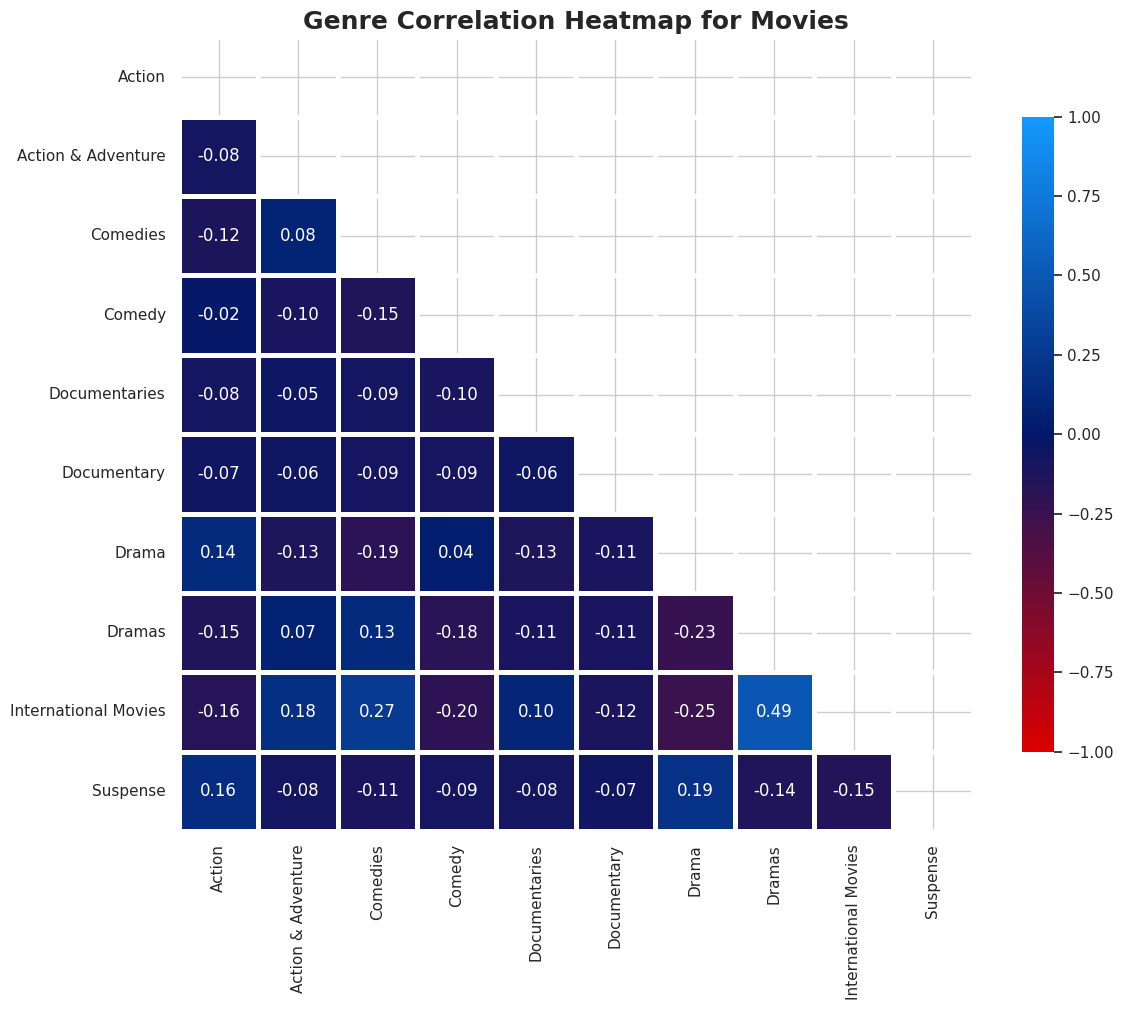

<ipython-input-68-c9f1375ae106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
<ipython-input-68-c9f1375ae106>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_genre'] = df['genre'].apply(lambda x: [genre for genre in x if genre in top_genres])


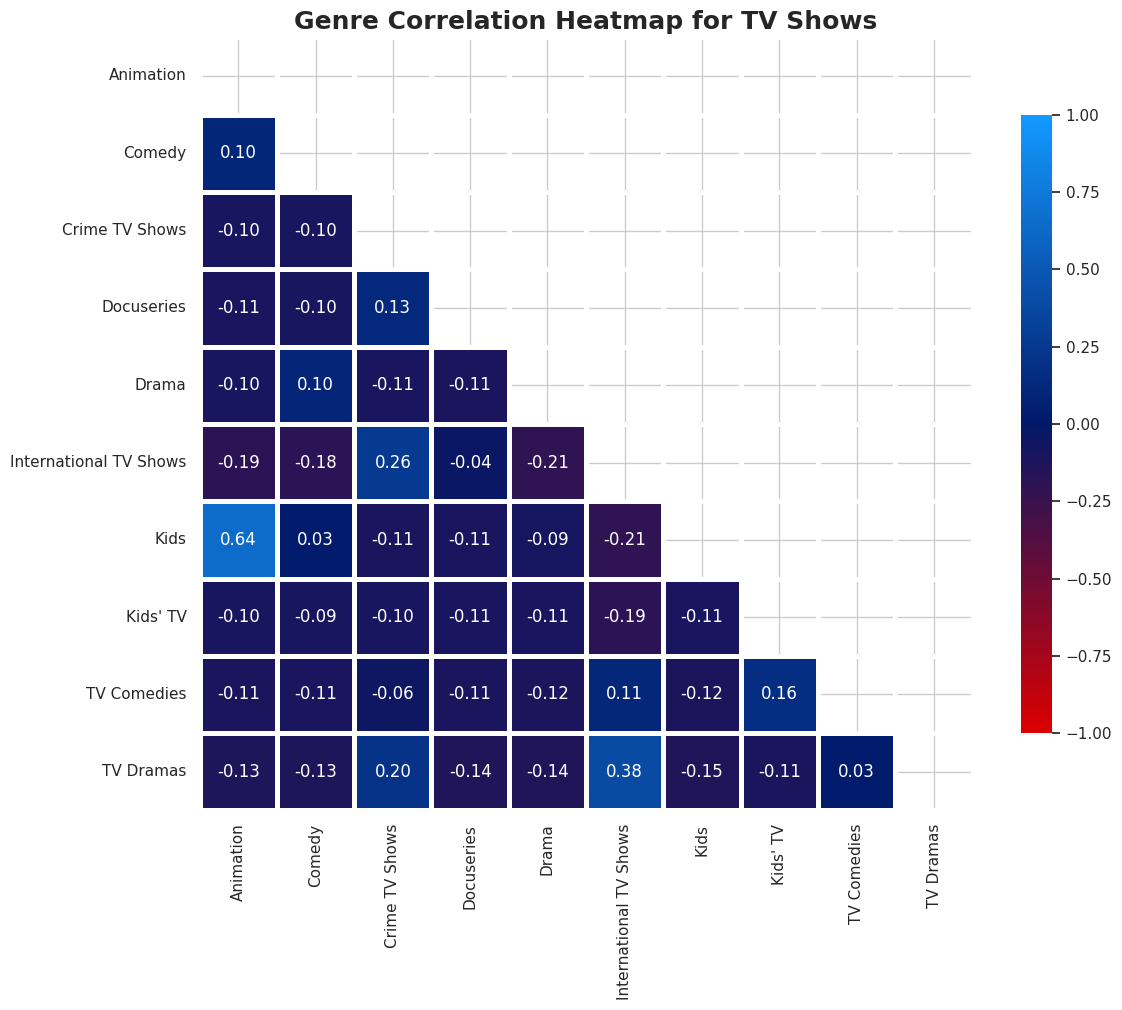

In [68]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [color_netflix, color_disney, color_amazon])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
    all_genres = [genre for sublist in df['genre'] for genre in sublist]
    genre_counts = pd.Series(all_genres).value_counts()
    top_genres = genre_counts.nlargest(10).index.tolist()
    df['filtered_genre'] = df['genre'].apply(lambda x: [genre for genre in x if genre in top_genres])
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(df['filtered_genre']), columns=mlb.classes_, index=df.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title(f'Genre Correlation Heatmap for {title}', fontsize=18, fontweight='bold')
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True,
                linewidths=2.5, annot=True, fmt=".2f", cbar_kws={"shrink": .8})
    plt.tight_layout()
    plt.show()

df_movies = df_mutual[df_mutual["type"] == "Movie"]
df_tv = df_mutual[df_mutual["type"] == "TV Show"]

genre_heatmap(df_movies, 'Movies')
genre_heatmap(df_tv, 'TV Shows')

#### Conclusions Based on Genre Correlation

**Movie Genre Correlation:**

1. **Strongest Correlations**:
   - **Animation and Family**: There is a strong positive correlation (0.54) between Animation and Family genres, indicating that animated films often cater to family audiences.
   - **Dramas and Family**: A notable positive correlation (0.33) exists between Dramas and Family genres, suggesting that family-oriented dramas are prevalent.

2. **Negative Correlations**:
   - **International Movies with Children's Genre**: A significant negative correlation (-0.22) is noted between International Movies and the Family genre, indicating that international films are less frequently categorized as family films.
   - **Dramas and Documentaries**: There is a negative correlation (-0.25) between Dramas and Documentaries, suggesting that these two genres may appeal to different audiences.

3. **Interesting Relationships**:
   - **Independent Movies and Dramas**: Independent Movies show a moderate positive correlation (0.33) with Dramas, highlighting that many independent films fall into the drama category.


**TV Show Genre Correlation:**

1. **Strongest Correlations**:
   - **Animation and Kids' TV**: There is a strong correlation (1.00) indicating that most animated shows are categorized as children's programming.
   - **Reality TV with International TV Shows**: Reality TV shows exhibit a positive correlation (0.17) with International TV Shows, suggesting a trend toward international formats in reality programming.

2. **Negative Correlations**:
   - **Kids' TV and International TV Shows**: A notable negative correlation (-0.34) indicates that children's shows are less likely to be international productions.
   - **TV Comedies and Dramas**: TV Comedies show a weak negative correlation (-0.13) with TV Dramas, suggesting that audiences may prefer to separate comedic content from dramatic content.

3. **Diverse Genre Interactions**:
   - **Romantic TV Shows and International TV Shows**: A positive correlation (0.34) indicates that many romantic TV shows might have international origins.

## Movie Recommendation

In [85]:
graph_colors = [  '#b0b0b0', '#c9d1e7', '#7b9bf2', '#deb7c8', '#f9e2ec', '#b7f3f9', '#b61d3d']

In [86]:
df_mutual['director'] = df_mutual['director'].fillna('Unknown')
df_mutual['cast'] = df_mutual['cast'].fillna('Unknown')
df_mutual['country'] = df_mutual['country'].fillna('Unknown')
df_mutual['rating'] = df_mutual['rating'].fillna('Not Rated')
df_mutual['target_ages'] = df_mutual['target_ages'].fillna('Not Rated')
df_mutual['listed_in'] = df_mutual['listed_in'].fillna('Unknown')


encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(df_mutual[['type']])
listed_in_encoded = encoder.fit_transform(df_mutual[['listed_in']])
target_ages_encoded = encoder.fit_transform(df_mutual[['target_ages']])
country_encoded = encoder.fit_transform(df_mutual[['country']])
director_encoded = encoder.fit_transform(df_mutual[['director']])
cast_encoded = encoder.fit_transform(df_mutual[['cast']])

df_mutual['release_year'] = (df_mutual['release_year'] - df_mutual['release_year'].min()) / (df_mutual['release_year'].max() - df_mutual['release_year'].min())
release_year_encoded = df_mutual[['release_year']].to_numpy()

vector = TfidfVectorizer(max_df=0.4, min_df=1, stop_words='english', lowercase=True, use_idf=True, norm='l2', smooth_idf=True)
tfidf_matrix = vector.fit_transform(df_mutual['description'])

description_weight = 2.0  # Increase description weight
tfidf_matrix_weighted = tfidf_matrix * description_weight

combined_matrix = hstack((
    tfidf_matrix_weighted,
    type_encoded,
    listed_in_encoded,
    target_ages_encoded,
    country_encoded,
    director_encoded,
    cast_encoded,
    release_year_encoded
))


In [71]:
k = 200  # No of clusters
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000)
kmeans.fit(combined_matrix)

df_mutual['cluster'] = kmeans.predict(combined_matrix)

In [72]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine').fit(combined_matrix)

_, indices = nbrs.kneighbors(combined_matrix)

def find_similar_within_cluster(movie_index, top_n=5):
    cluster_id = df_mutual.iloc[movie_index]['cluster']

    cluster_items = df_mutual[df_mutual['cluster'] == cluster_id].index

    cluster_matrix = combined_matrix[cluster_items]
    query_matrix = combined_matrix[movie_index:movie_index+1]

    similarities = linear_kernel(query_matrix, cluster_matrix).flatten()
    top_indices = similarities.argsort()[::-1][:top_n]

    return df_mutual.iloc[cluster_items[top_indices]][['title', 'description', 'type', 'listed_in']]

In [73]:
G = nx.Graph(label="MOVIE")

for i, row in df_mutual.iterrows():
    G.add_node(row['title'], key=row['title'], label="MOVIE", mtype=row['type'], rating=row['rating'])

    G.add_node(row['type'], label="TYPE")
    G.add_edge(row['title'], row['type'], label="IS_TYPE")

    G.add_node(row['target_ages'], label="AGE_RATING")
    G.add_edge(row['title'], row['target_ages'], label="AGE_RATING")

    genres_list = row['listed_in'].split(", ")
    for genre in genres_list:
        G.add_node(genre, label="CAT")
        G.add_edge(row['title'], genre, label="LISTED_IN")

    cast_list = row['cast'].split(", ")
    for actor in cast_list:
        G.add_node(actor, label="PERSON")
        G.add_edge(row['title'], actor, label="ACTED_IN")

    directors_list = row['director'].split(", ")
    for director in directors_list:
        G.add_node(director, label="PERSON")
        G.add_edge(row['title'], director, label="DIRECTED")

    countries_list = row['country'].split(", ")
    for country in countries_list:
        G.add_node(country, label="COU")
        G.add_edge(row['title'], country, label="COUNTRY")

In [74]:
def get_recommendation(movie_title, G, top_n=5):
    commons_dict = {}

    for e in G.neighbors(movie_title):
        for e2 in G.neighbors(e):
            if e2 == movie_title:
                continue
            if G.nodes[e2]['label'] == "MOVIE":
                commons = commons_dict.get(e2)
                if commons is None:
                    commons_dict[e2] = [e]
                else:
                    commons.append(e)
                    commons_dict[e2] = commons

    movies = []
    weight = []

    for key, values in commons_dict.items():
        w = 0.0
        for e in values:
            w += 1 / math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight), index=movies)
    result.sort_values(ascending=False, inplace=True)

    return result.head(top_n)

recommendations = get_recommendation("Ernest Saves Christmas", G, top_n=5)
print(recommendations)

Wilder Napalm      1.058073
Toy Story 2        0.952599
Toy Story          0.825568
Evan Almighty      0.461793
Almost An Angel    0.461793
dtype: float64


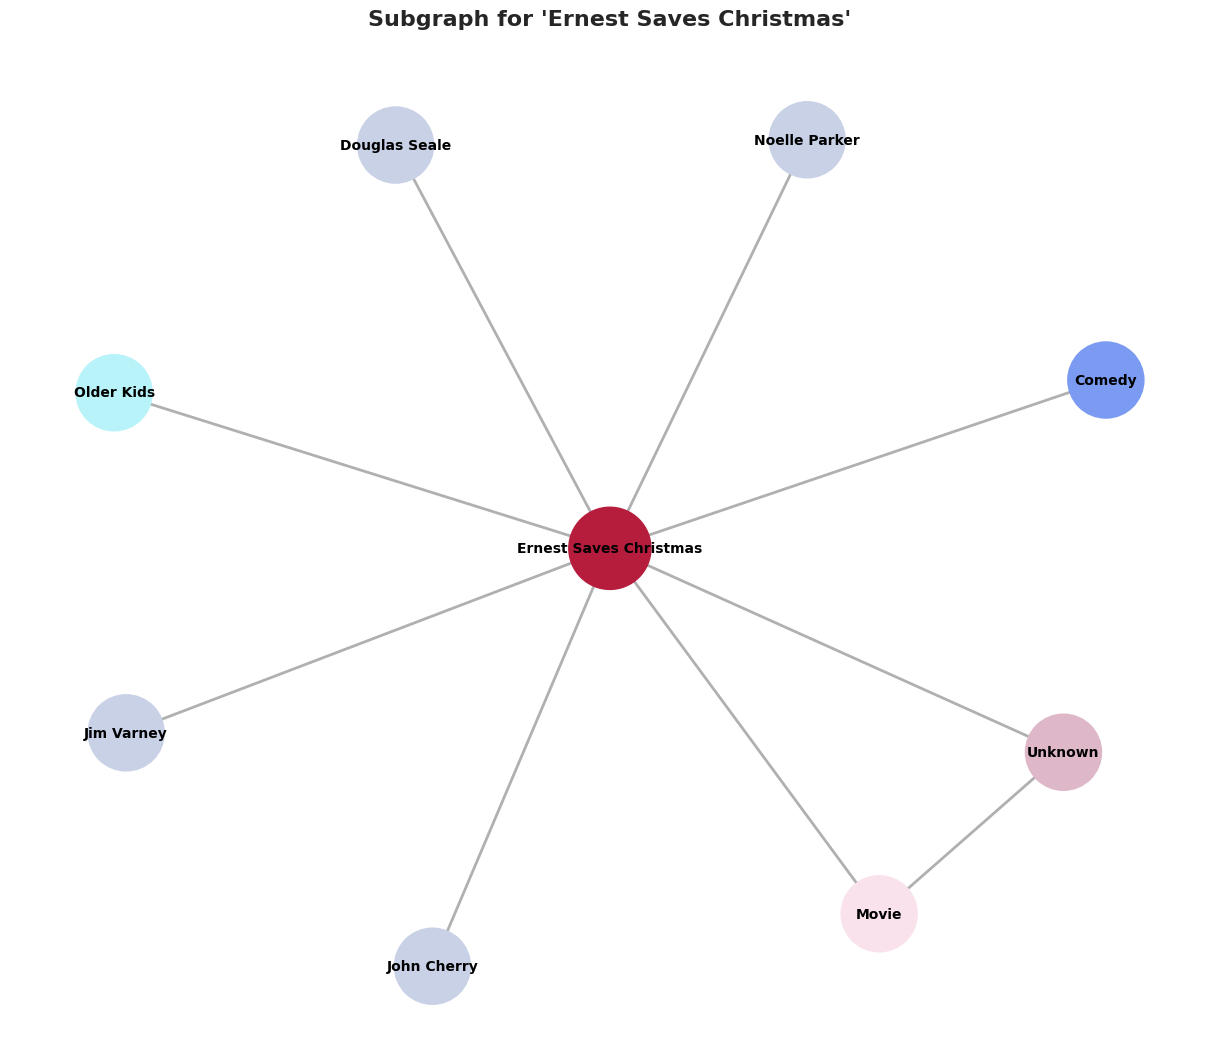

In [87]:
def wrap_text(text, width=12):
    return '\n'.join(textwrap.wrap(text, width=width))

def draw_movie_subgraph(movie_title, G):
    neighbors = list(G.neighbors(movie_title))
    nodes_to_draw = [movie_title] + neighbors
    subgraph = G.subgraph(nodes_to_draw)

    colors = []
    node_sizes = []
    for node in subgraph.nodes:
        if G.nodes[node]['label'] == 'MOVIE':
            colors.append(graph_colors[6])
            node_sizes.append(3500)
        elif G.nodes[node]['label'] == 'PERSON':
            colors.append(graph_colors[1])
            node_sizes.append(3000)
        elif G.nodes[node]['label'] == 'CAT':
            colors.append(graph_colors[2])
            node_sizes.append(3000)
        elif G.nodes[node]['label'] == 'COU':
            colors.append(graph_colors[3])
            node_sizes.append(3000)
        elif G.nodes[node]['label'] == 'TYPE':
            colors.append(graph_colors[4])
            node_sizes.append(3000)
        else:
            colors.append(graph_colors[5])
            node_sizes.append(3000)

    pos = nx.spring_layout(subgraph, k=0.6, seed=42)

    plt.figure(figsize=(12, 10))

    nx.draw(
        subgraph, pos, with_labels=True, node_color=colors, node_size=node_sizes,
        font_size=10, font_weight='bold', edge_color=graph_colors[0], width=2,
        font_color=text_color
    )

    plt.title(f"Subgraph for '{movie_title}'", fontsize=16, fontweight='bold', pad=20)

    plt.show()

draw_movie_subgraph("Ernest Saves Christmas", G)

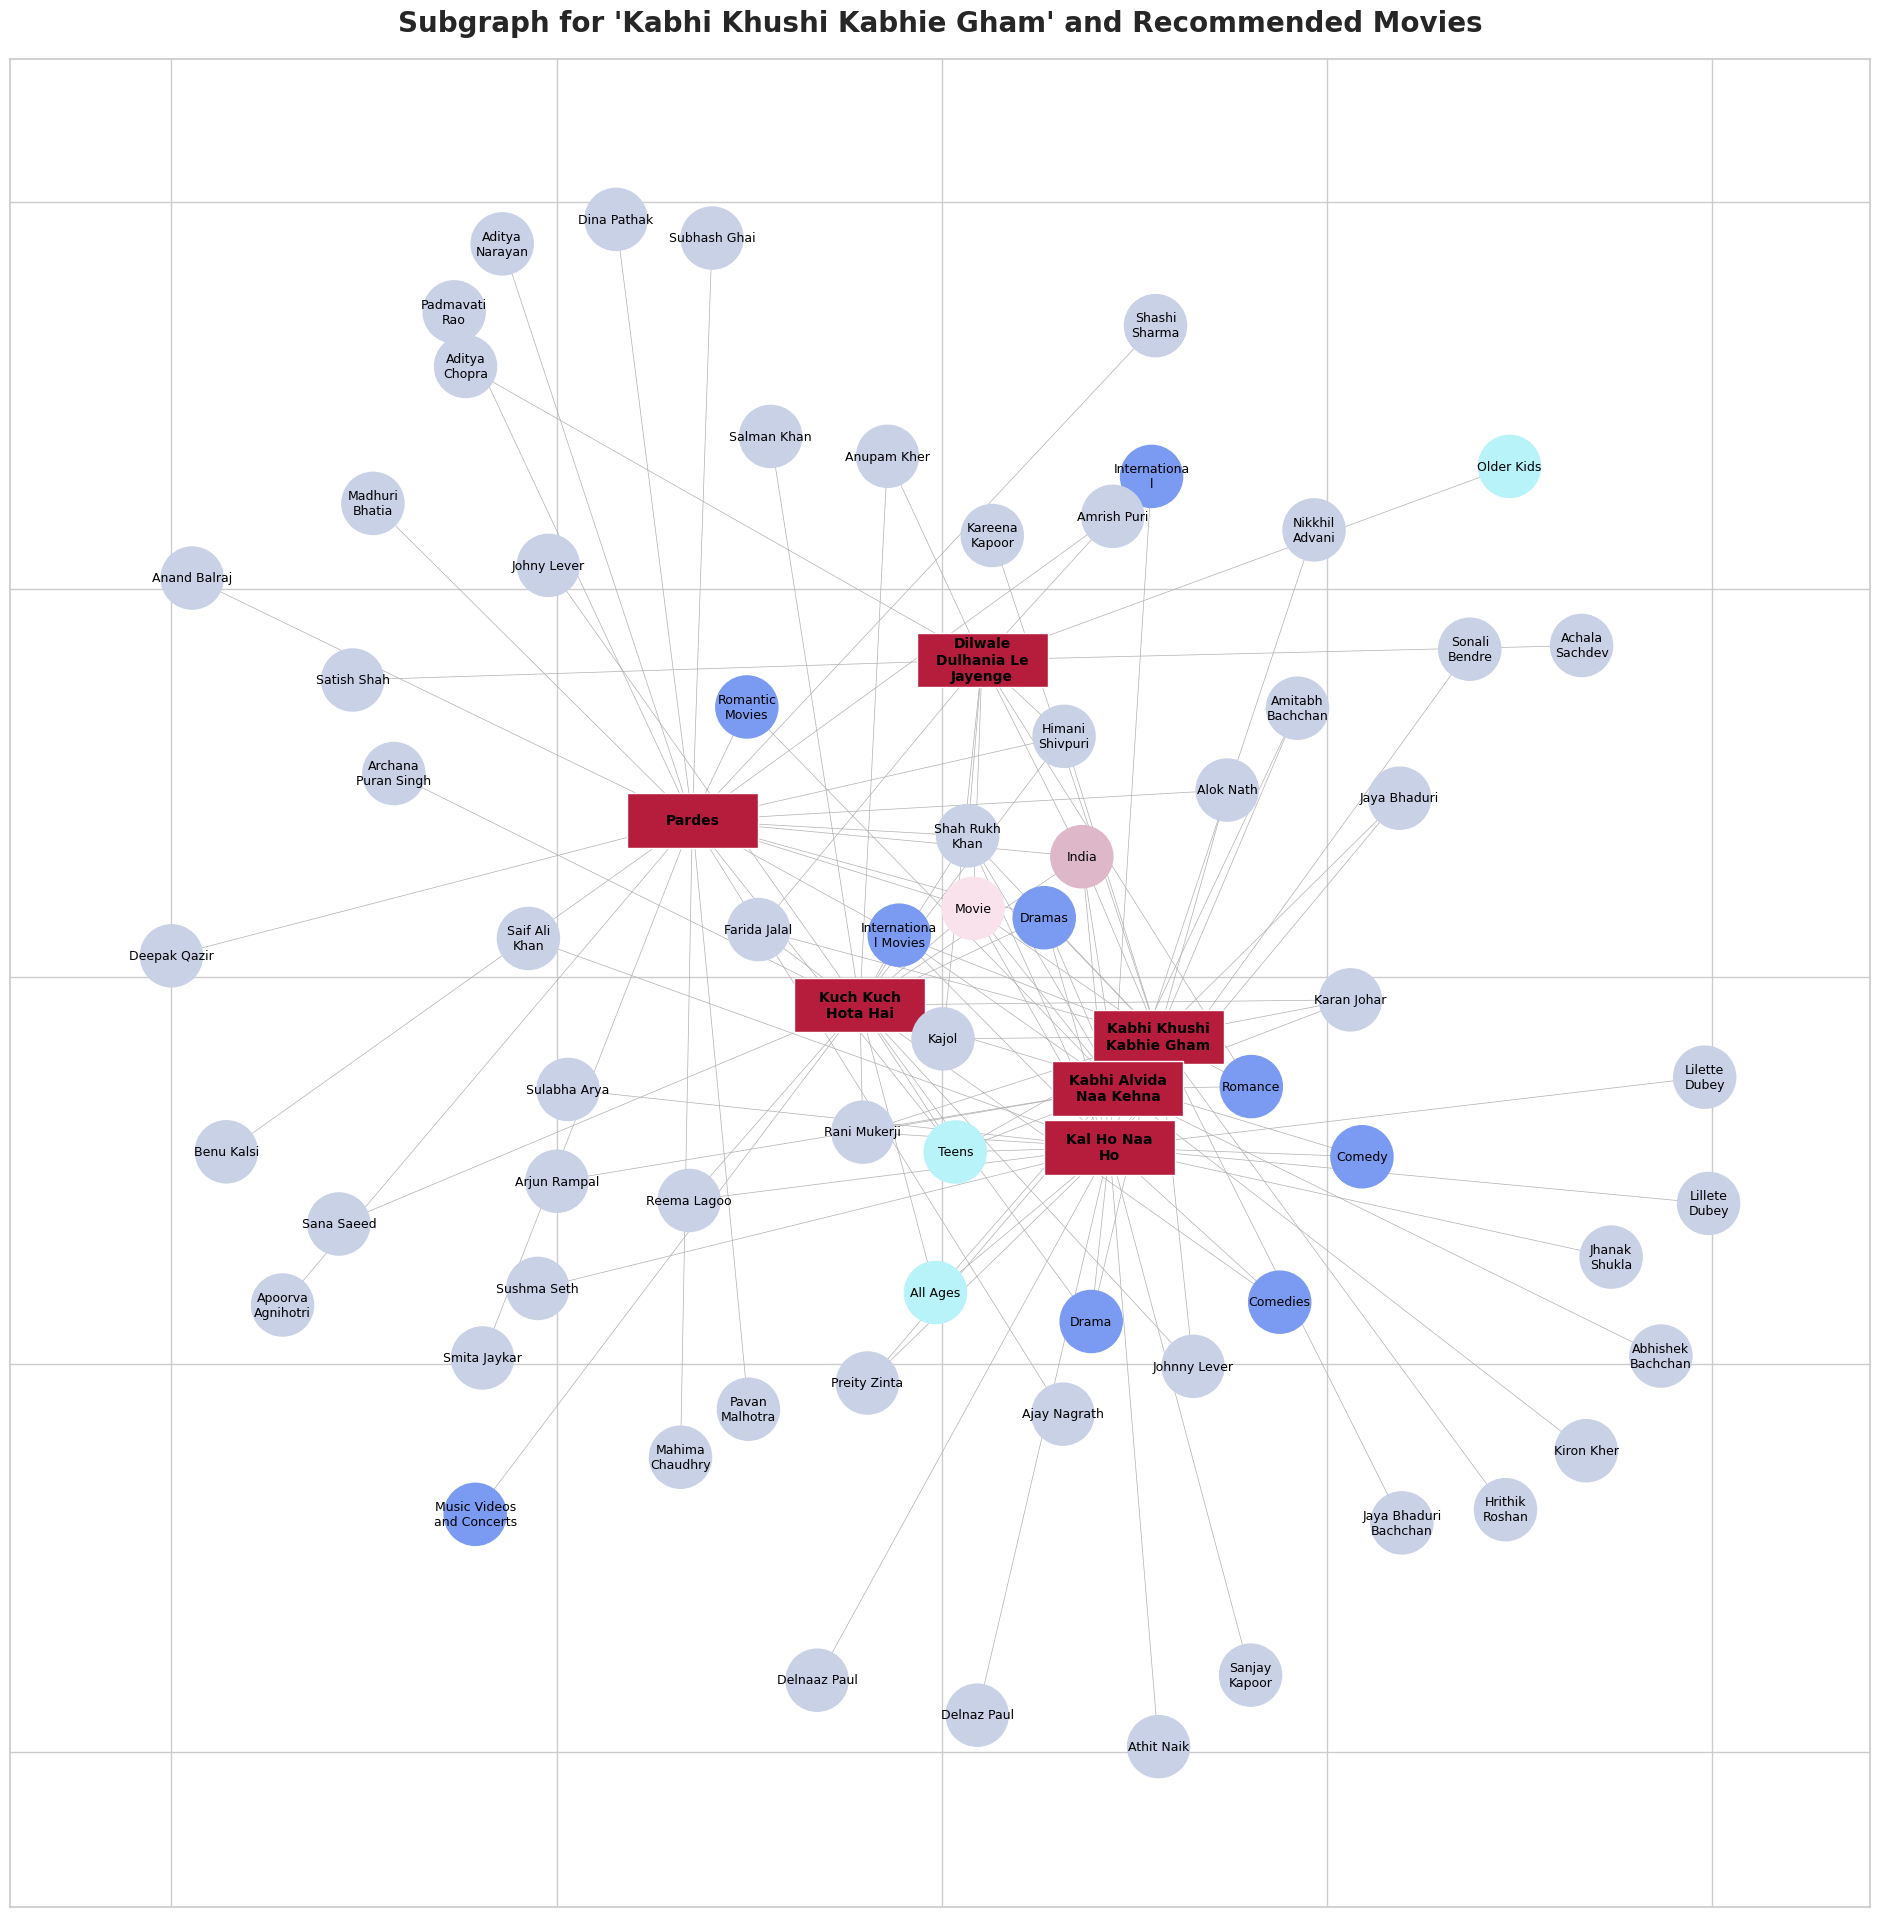

In [92]:
def wrap_text(text, width=12):
    return '\n'.join(textwrap.wrap(text, width=width))

def draw_custom_node(ax, pos, node, label, width=0.17, height=0.07, color=graph_colors[6]):
    x, y = pos[node]
    rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, edgecolor=None, facecolor=color)
    ax.add_patch(rect)
    ax.text(x, y, label, horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold', color=text_color)

def draw_recommendations_subgraph(movie_title, G, recommendations):
    neighbors = list(G.neighbors(movie_title))
    nodes_to_draw = [movie_title] + neighbors

    for reco_movie in recommendations.index:
        reco_neighbors = list(G.neighbors(reco_movie))
        nodes_to_draw.append(reco_movie)
        nodes_to_draw.extend(reco_neighbors)

    subgraph = G.subgraph(nodes_to_draw)

    node_colors = []
    shapes = {}
    for node in subgraph.nodes:
        if G.nodes[node]['label'] == 'MOVIE':
            node_colors.append(graph_colors[6])
            shapes[node] = 'rect'
        elif G.nodes[node]['label'] == 'PERSON':
            node_colors.append(graph_colors[1])
            shapes[node] = 'circle'
        elif G.nodes[node]['label'] == 'CAT':
            node_colors.append(graph_colors[2])
            shapes[node] = 'circle'
        elif G.nodes[node]['label'] == 'COU':
            node_colors.append(graph_colors[3])
            shapes[node] = 'circle'
        elif G.nodes[node]['label'] == 'TYPE':
            node_colors.append(graph_colors[4])
            shapes[node] = 'circle'
        else:
            node_colors.append(graph_colors[5])
            shapes[node] = 'circle'

    pos = nx.spring_layout(subgraph, k=0.6, seed=42)  # Adjust spacing for better clarity

    fig, ax = plt.subplots(figsize=(24, 24))
    nx.draw_networkx_edges(subgraph, pos, edge_color=graph_colors[0], width=0.5, ax=ax)


    for node_shape in set(shapes.values()):
        node_list = [node for node in subgraph.nodes if shapes[node] == node_shape]
        if node_shape == 'circle':
            nx.draw_networkx_nodes(
                subgraph, pos, nodelist=node_list, node_color=[node_colors[list(subgraph.nodes).index(node)] for node in node_list],
                node_size=2000, node_shape='o', ax=ax
            )

    for node in subgraph.nodes:
        if shapes[node] == 'rect':
            draw_custom_node(ax, pos, node, wrap_text(node), width=0.17, height=0.07, color=graph_colors[6])

    labels = {node: wrap_text(node) for node in subgraph.nodes}

    #nx.draw_networkx_edges(subgraph, pos, edge_color=graph_colors[0], width=0.5, ax=ax)

    non_rect_nodes = [node for node in subgraph.nodes if shapes[node] != 'rect']
    nx.draw_networkx_labels(subgraph, pos, labels={node: labels[node] for node in non_rect_nodes}, font_size=9, font_weight='normal',
                            font_color=text_color, ax=ax)

    plt.title(f"Subgraph for '{movie_title}' and Recommended Movies", fontsize=20, fontweight='bold', pad=20)

    plt.show()

recommendations = get_recommendation("Kabhi Khushi Kabhie Gham", G, top_n=5)
draw_recommendations_subgraph("Kabhi Khushi Kabhie Gham", G, recommendations)
